In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import pycountry
import time
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier

from sklearn.ensemble import VotingRegressor,VotingClassifier
from sklearn.ensemble import StackingClassifier,StackingRegressor

from sklearn.model_selection import GridSearchCV

In [2]:
# Load the datasets into DataFrame
players = pd.read_csv('players_fifa23.csv')
teams = pd.read_csv('teams_fifa23.csv')

In [3]:
teams.head()

,ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
0,1943,AFC Bournemouth,English Premier League (1),13,74,75,73,73,0,2,1,28,25.8,25.5
1,116418,AFC Richmond,English Premier League (1),13,78,81,79,77,0,5,3,19,27.3,27.3
2,1,Arsenal,English Premier League (1),13,80,83,81,79,0,7,7,29,24.1,23.0
3,2,Aston Villa,English Premier League (1),13,79,79,78,80,0,5,3,32,25.8,25.2
4,1925,Brentford,English Premier League (1),13,75,75,74,75,0,1,1,30,25.4,24.2


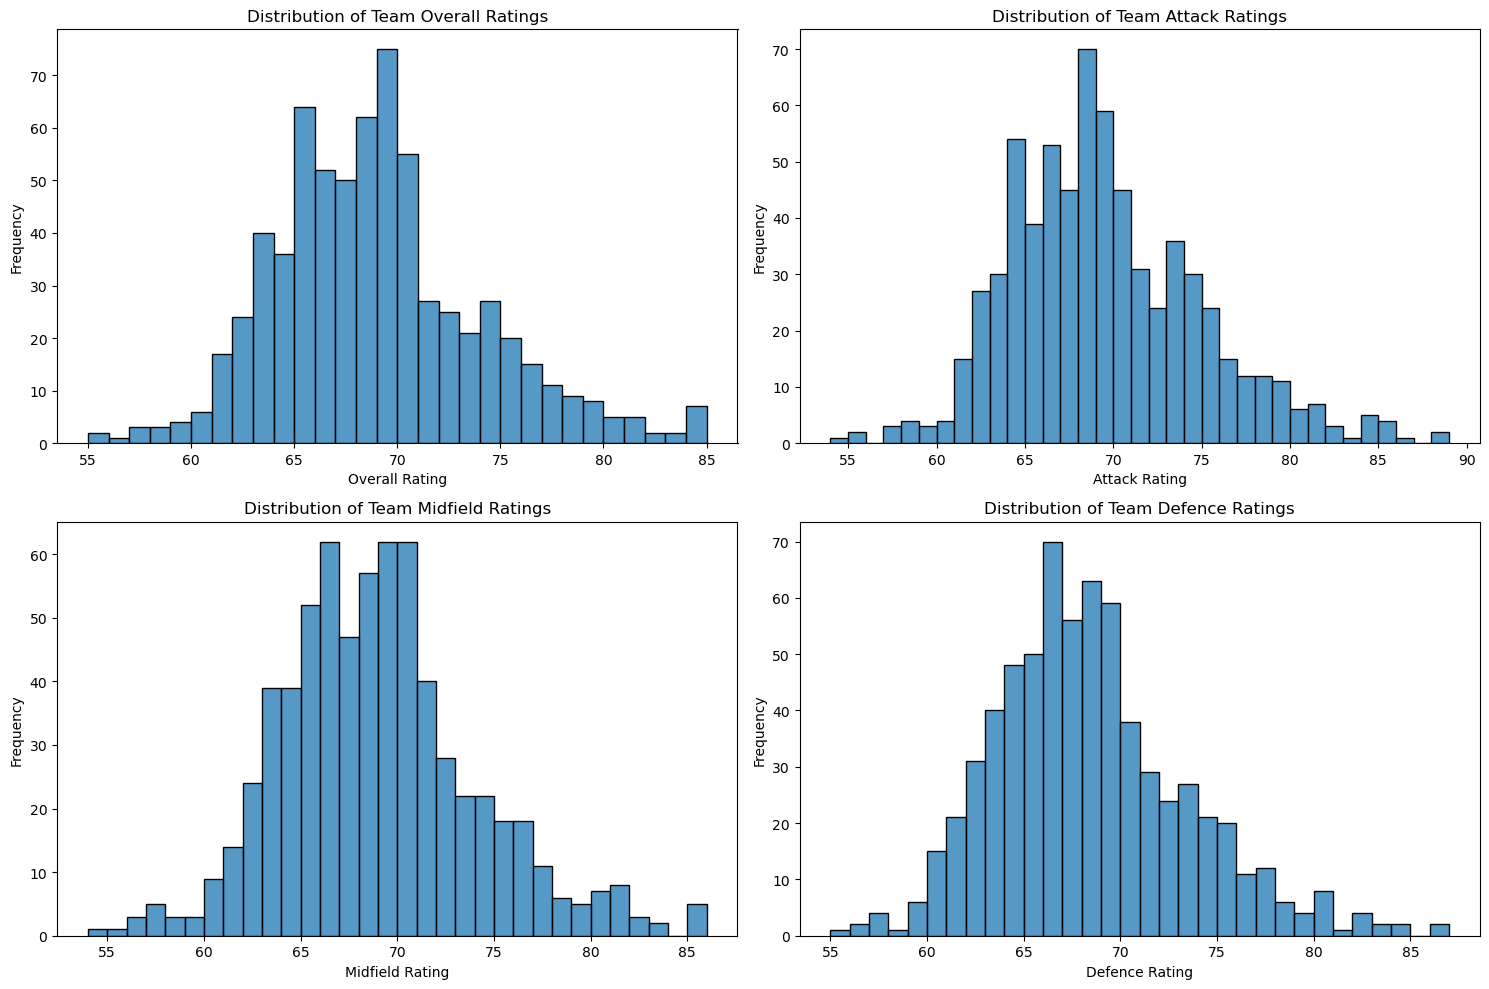

In [4]:
# Create a list of column names
cols = ['Overall', 'Attack', 'Midfield', 'Defence']

# Create subplots using a loop
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, a in enumerate(cols):
#     row = i // 2
#     col = i % 2
    row,col = divmod(i, 2)
    ax = axes[row, col]
    bins = np.arange(int(teams[a].min()), int(teams[a].max() + 1), 1)
    sns.histplot(teams[a], bins = bins, ax=ax)
    ax.set_xlabel(f'{a} Rating')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of Team {a} Ratings')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

The histograms depicting the distribution of team ratings, including Overall, Attack, Midfield, and Defence, reveal a pattern consistent with a normal distribution. Here are key insights inferred from the visual representation:

1. **Normal Distribution Pattern:** The resemblance to a normal distribution indicates that the majority of teams have their ratings concentrated around a central value, creating a bell-shaped curve. This is a common pattern in statistical distributions, suggesting that most teams fall within an average or typical range of ratings.

2. **Central Cluster Around 65-70 Points:** The highest frequency of teams is observed in the range of 65 to 70 points for each of the four ratings (Overall, Attack, Midfield, and Defence). This central cluster implies that a substantial number of teams have average or moderate ratings in these aspects, forming the peak of the normal distribution curve.

3. **Decreasing Frequency as Ratings Deviate:** As the ratings move further away from the central range (65 to 70 points), there is a noticeable decline in the frequency of teams with such ratings. This tapering off on both ends of the spectrum indicates that teams with exceptionally high or low ratings are less common, contributing to the normal distribution pattern.

4. **Interpretation of Ratings:** Teams with ratings around the central range are likely to be well-balanced across Overall, Attack, Midfield, and Defence aspects. Ratings deviating towards the higher end may signify teams with outstanding strengths, while lower ratings may indicate areas of potential improvement or weaknesses.

5. **Implications for Team Competitiveness:** The normal distribution pattern suggests that a majority of teams fall within a competitive mid-range of ratings. This distribution aligns with the idea that in a competitive sports context, most teams are likely to possess a mix of strengths and areas for improvement, contributing to a balanced and competitive landscape.

6. **Consideration for Team Strategies:** Teams and managers can use this understanding of the distribution of ratings to inform their strategies. Recognizing the prevalence of teams with ratings in the mid-range may influence tactical decisions, recruitment strategies, and areas of focus in team development.

In summary, the visual representation of the histograms illustrates a normal distribution pattern in team ratings, highlighting the central tendency of ratings around 65 to 70 points. This information provides valuable insights into the competitive landscape of teams, helping stakeholders interpret the distribution of ratings and make informed decisions for team management and strategic planning.

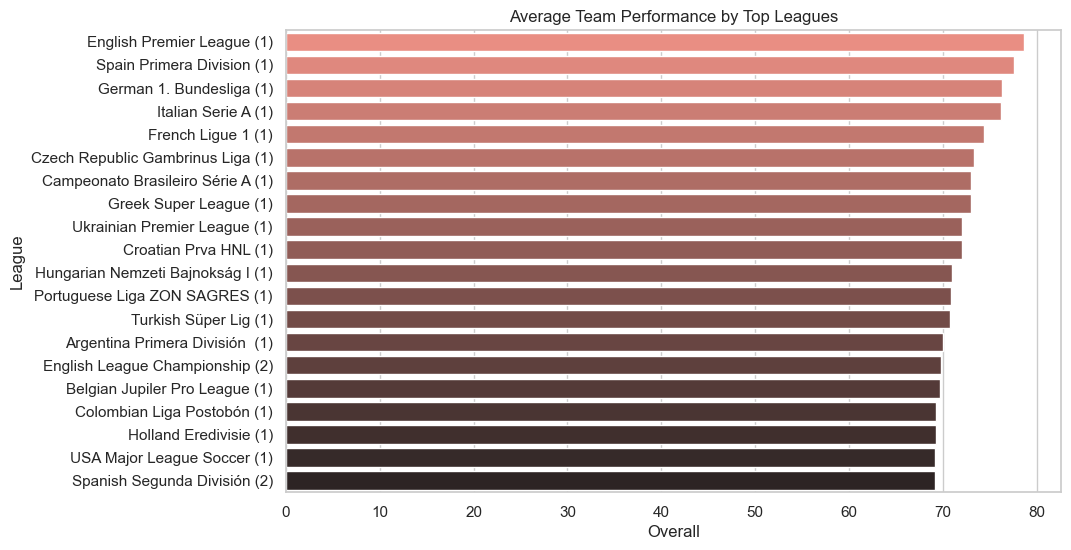

In [5]:
# Analyze team performance by league
league_performance = teams.groupby('League')[['Overall', 'Attack', 'Midfield', 'Defence']].mean().reset_index()
league_performance = league_performance.sort_values('Overall', ascending=False)
top_leagues = league_performance.head(20)

# Create a horizontal bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Overall', y='League', data=top_leagues, palette="dark:salmon_r")
plt.title('Average Team Performance by Top Leagues')
plt.xlabel('Overall')
plt.ylabel('League')
plt.show()

The bar plot, offering insights into the average team performance across top football leagues, provides valuable information for stakeholders. Here are key observations and inferences drawn from the chart:

1. **Clear Comparative Analysis:** The bar plot serves as an effective tool for stakeholders to compare the average performance of teams in different top football leagues. The visual representation allows for a quick and intuitive assessment of league standings based on Overall ratings.

2. **Top Five Leagues Identified:** The chart highlights the English Premier League, Spain Primera Division, German 1. Bundesliga, Italian Serie A, and French Ligue 1 as the top five leagues with the highest overall performance. These leagues stand out in terms of the aggregated ratings of teams across all performance aspects.

3. **Implication of High Overall Performance:** The observation that these top five leagues consistently lead in overall performance suggests that they are likely to attract more attention from viewers and fans globally. Higher overall performance often correlates with more competitive and entertaining football, contributing to the popularity of these leagues.

4. **Viewer Attraction and Global Appeal:** The inference that these leagues are more attractive to viewers aligns with the global appeal of football. Leagues with high overall performance are likely to have a larger fan base, increased viewership, and heightened interest from football enthusiasts worldwide.

5. **Potential Factors Contributing to Attractiveness:** The attractiveness of these top five leagues could be attributed to various factors, including the quality of teams, competitive balance, star players, and the intensity of matches. Stakeholders, such as broadcasters, sponsors, and advertisers, may find these leagues particularly appealing for their investments.

6. **Considerations for Stakeholder Decision-Making:** Stakeholders, including league organizers, broadcasters, and sponsors, can use this information to inform decision-making processes. Understanding the relative performance of leagues allows for strategic planning, marketing initiatives, and resource allocation based on the popularity and competitiveness of each league.

In summary, the bar plot effectively communicates the average team performance across top football leagues, highlighting the dominance of the English Premier League, Spain Primera Division, German 1. Bundesliga, Italian Serie A, and French Ligue 1. The insights gained from this visual representation are valuable for stakeholders seeking to understand and capitalize on the global appeal of these top-performing leagues.

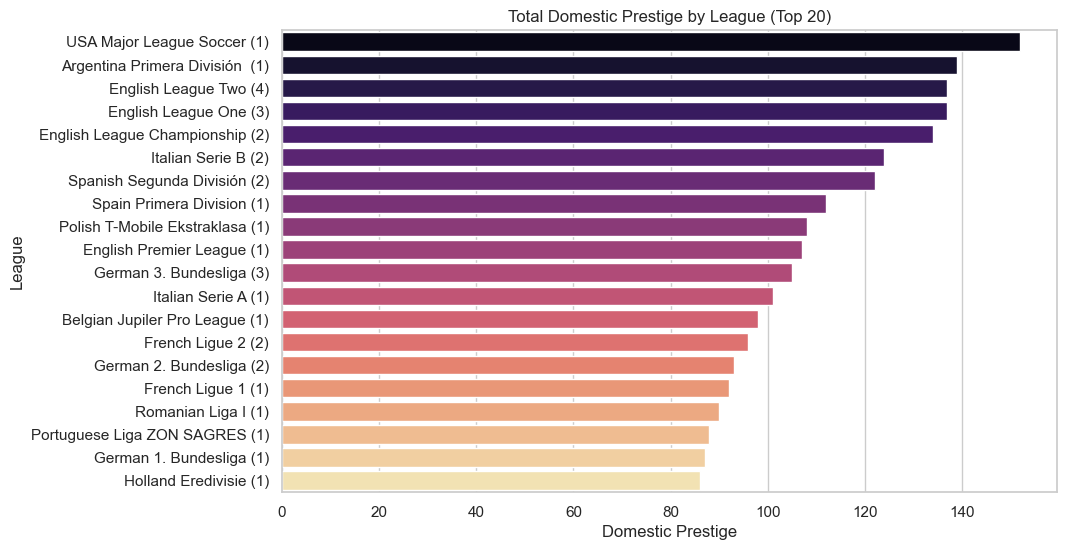

In [6]:
# Analyze league competitiveness
league_competitiveness = teams.groupby('League')['DomesticPrestige'].sum().reset_index()
league_competitiveness = league_competitiveness.sort_values('DomesticPrestige', ascending=False)
top_competitive_leagues = league_competitiveness.head(20)

# Create a horizontal bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='DomesticPrestige', y='League', data=top_competitive_leagues, palette="magma")
plt.title('Total Domestic Prestige by League (Top 20)')
plt.xlabel('Domestic Prestige')
plt.ylabel('League')
plt.show()

The chart serves as a valuable tool for stakeholders, providing a visual representation of the cumulative DomesticPrestige metric for different leagues. This allows for a comparative assessment of league competitiveness based on their DomesticPrestige scores. It is indeed surprising that the USA Major League Soccer attains the highest Domestic Prestige score, exceeding 150. This can be attributed to various factors, such as the league's growing popularity, investments in infrastructure, player development, and the increasing global recognition of the league. These elements have contributed to its impressive DomesticPrestige score.

Next in line are leagues with DomesticPrestige scores ranging between 120 and 140. Among them, we find the Argentina Primera División and three English leagues: English League Two, English League One, and English League Championship. Additionally, there's the Italian Serie B and the Spanish Segunda División.

DomesticPrestige is a metric that reflects the domestic reputation and recognition of a league. While Overall performance encompasses various aspects of a league's performance on the field, DomesticPrestige primarily focuses on the league's standing and recognition within its home country. This differentiation explains why leagues like the English Premier League, Spain Primera Division, German 1. Bundesliga, Italian Serie A, and French Ligue 1, which scored high in Overall performance, may not necessarily be at the top for DomesticPrestige. Leagues like MLS and Argentina Primera División may have a more significant domestic following and recognition, leading to their high DomesticPrestige scores, even if their overall performance might not be on par with the top European leagues.

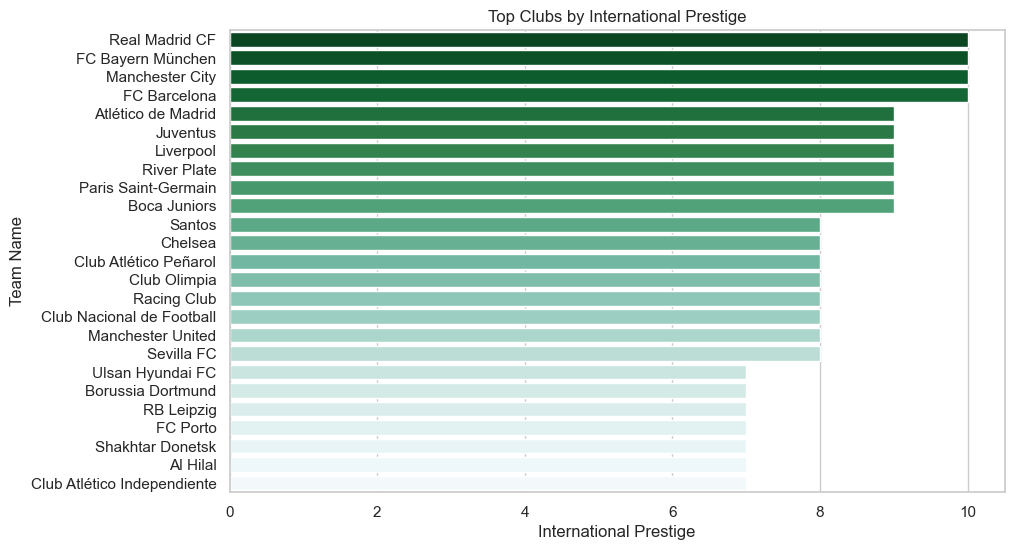

In [7]:
# Analyze team international success
team_int_success = teams[['Name', 'IntPrestige']].sort_values('IntPrestige', ascending=False).head(25)

# Create a horizontal bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='IntPrestige', y='Name', data=team_int_success, palette="BuGn_r")
plt.title('Top Clubs by International Prestige')
plt.xlabel('International Prestige')
plt.ylabel('Team Name')
plt.show()

The chart serves as a valuable resource for stakeholders, offering a visual representation of the top clubs based on their International Prestige. This allows for a direct comparison and identification of the most successful teams in international competitions, as determined by their IntPrestige metric. Notably, the chart highlights four clubs that have achieved the highest possible score of 10, indicating an exceptional level of International Prestige. These clubs include Real Madrid CF, FC Barcelona, and Atlético de Madrid from Spain Primera Division, FC Bayern München from the German 1. Bundesliga, and Manchester City from the English Premier League.

This observation underscores an interesting distinction between Domestic Prestige and International Prestige. While the domestic prestige of a league is largely influenced by its reputation and recognition within its home country, International Prestige primarily reflects a club's performance and recognition on the global stage. In this case, it is evident that these clubs have earned the highest International Prestige scores because they hail from leagues with the highest Overall performance. These top European leagues consistently produce clubs that perform exceptionally well in international competitions, which contributes to their impressive International Prestige.

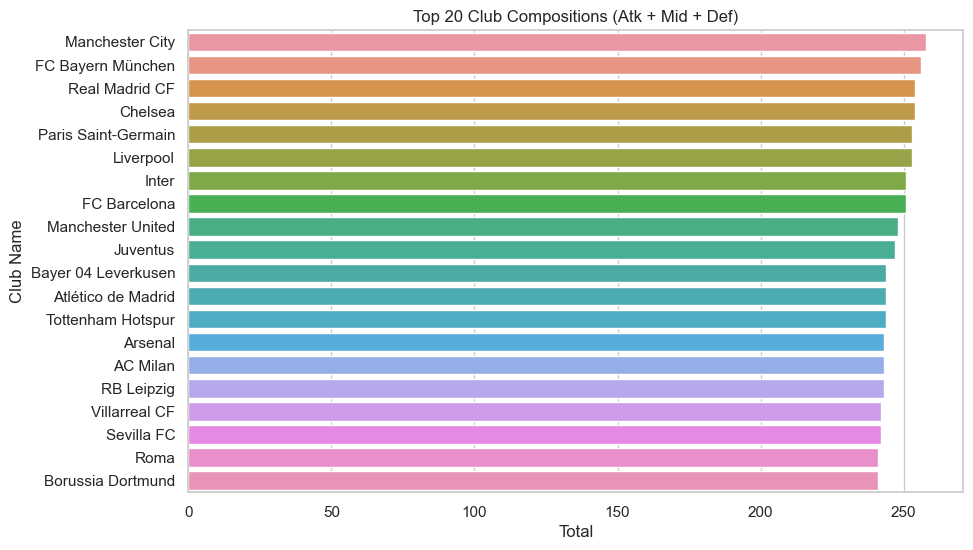

In [8]:
# Analyze team composition
teams['Total'] = teams['Attack'] + teams['Midfield'] + teams['Defence']
top_teams = teams.sort_values('Total', ascending=False).head(20)

# Create a horizontal bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='Name', data=top_teams)
plt.title('Top 20 Club Compositions (Atk + Mid + Def)')
plt.xlabel('Total')
plt.ylabel('Club Name')
plt.show()

The chart serves as a valuable tool for stakeholders, offering a visual representation of the top 20 teams based on the composition of their Attack, Midfield, and Defence, enabling a comparative analysis to identify the teams with the strongest overall performance as determined by the Total metric. In this analysis, it's evident that the top 6 football clubs that have achieved a Total metric score above 250 are Manchester City, FC Bayern München, Real Madrid CF, Chelsea, Paris Saint-Germain, and Liverpool.

This observation provides valuable insights, which can be inferred from both this chart and previous charts:

**Consistency in Top Performance**: The presence of these clubs in the top 20 and their dominance in the Total metric suggests that they consistently excel in various aspects of the game, such as attack, midfield, and defense. This consistency is a hallmark of top-performing clubs.

**Strong Leagues**: These clubs are primarily from the top leagues that have demonstrated high overall performance in previous charts. This connection further reinforces the idea that strong leagues produce strong clubs. These clubs often compete in leagues with high levels of competitiveness and are more likely to participate in international competitions, boosting their recognition and Total metric scores.

**Global Recognition**: Clubs like Manchester City, FC Bayern München, Real Madrid CF, Chelsea, Paris Saint-Germain, and Liverpool are recognized and followed globally, as evidenced by their strong presence in both domestic and international competitions. Their performances in top leagues and international competitions contribute to their Total metrics, making them prominent and attractive to football fans worldwide.

In summary, this chart, in conjunction with previous charts, reaffirms the link between strong leagues, consistent club performance, and global recognition in the world of football. These factors collectively contribute to the success and high Total metric scores of these top football clubs.

In [9]:
players.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21


In [10]:
players['BMI'] = players['Weight'] / (players['Height']/100)**2
goalkeeper = ['GK']
defender = ['CB','LB','RB','LWB','RWB']
midfielder = ['CM','LM','RM','CAM','CDM']
forward = ['ST','CF','RW','LW']
players['MainPosition'] = np.where(players['BestPosition'].isin(goalkeeper), 'Goalkeeper',
                 np.where(players['BestPosition'].isin(defender), 'Defender',
                 np.where(players['BestPosition'].isin(midfielder), 'Midfielder',
                 np.where(players['BestPosition'].isin(forward), 'Forward', 'Other'))))
position_order = ['Goalkeeper','Defender','Midfielder','Forward']
color_order = {'Goalkeeper': 'orange', 'Defender': 'blue', 'Midfielder': 'green', 'Forward': 'red'}

In [11]:
players[['Height','Weight','Age','BMI','Growth','BestPosition','MainPosition']]

,Height,Weight,Age,BMI,Growth,BestPosition,MainPosition
0,169,67,35,23.458562,0,CAM,Midfielder
1,185,81,34,23.666910,0,CF,Forward
2,185,81,33,23.666910,0,ST,Forward
3,181,70,31,21.366869,0,CM,Midfielder
4,182,73,23,22.038401,4,ST,Forward
...,...,...,...,...,...,...,...
18534,174,68,21,22.460034,9,CAM,Midfielder
18535,175,60,17,19.591837,10,CDM,Midfielder
18536,170,65,18,22.491349,20,RM,Midfielder
18537,178,65,17,20.515086,14,CB,Defender


We manipulate a dataset called players:
* First add a new column to the dataset called 'BMI', which calculates the Body Mass Index of each player based on their weight in kilograms and their height in meters.
* Next, categorize each player's "BestPosition" into one of four main positions: "Goalkeeper", "Defender", "Midfielder", or "Forward". The mapping of BestPosition to MainPosition is done using a series of nested numpy "where" statements, which assign each player's MainPosition based on their BestPosition.
* Then, creates two variables called 'position_order' and 'color_order'. The 'position_order' variable is a list that specifies the order in which the main positions should be displayed in the resulting dataframe. The 'color_order' variable is a dictionary that maps each main position to a color for use in visualizations.
* Finally, select a subset of columns from the players dataset and displays them, including 'Height', 'Weight', 'Age', 'BMI', 'Growth', 'BestPosition', and 'MainPosition'. This displays a dataframe that includes the new 'BMI' and 'MainPosition' columns that were added earlier.

**Overall, this code appears to be preparing the players dataset for analysis and visualization, specifically by creating a new column for BMI, categorizing players by their main position, and selecting a subset of columns for display.**

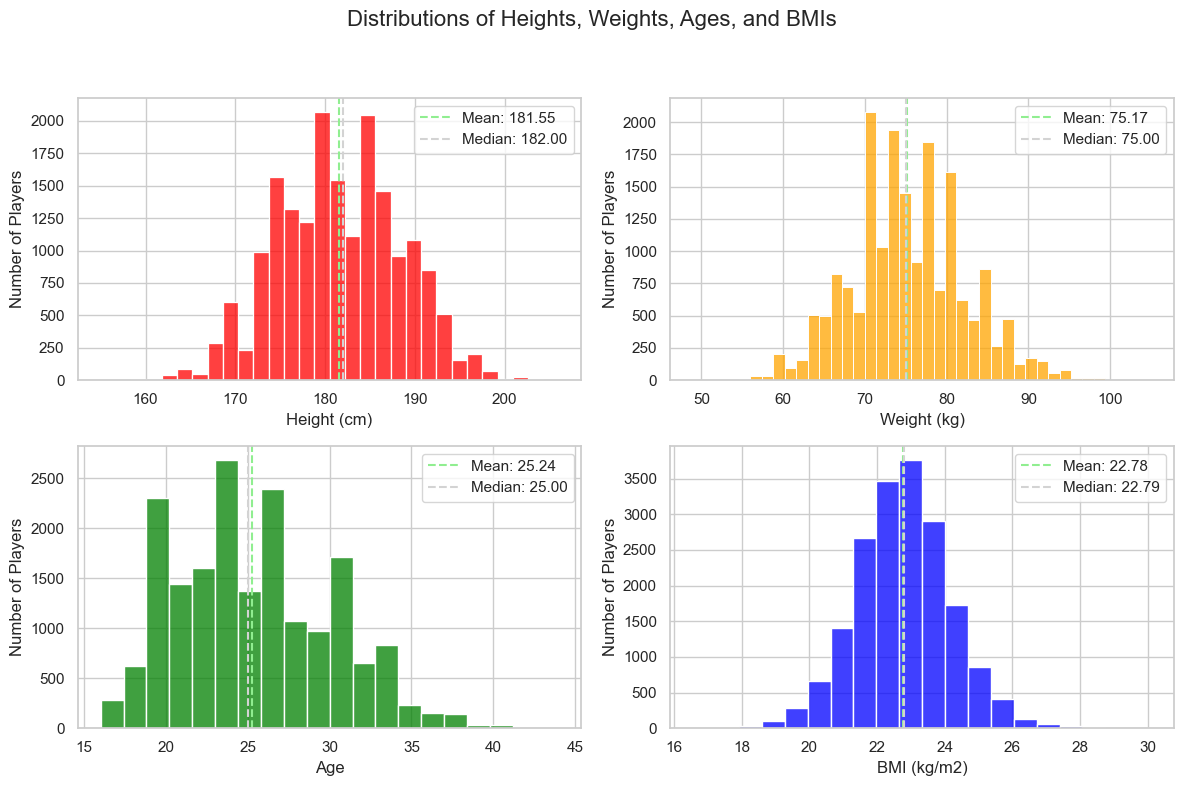

In [12]:
# Create subplots with Seaborn and Matplotlib
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distributions of Heights, Weights, Ages, and BMIs", fontsize=16)

# Distribution of Heights
sns.histplot(players['Height'], bins=30, ax=axes[0, 0], color='red')
axes[0, 0].axvline(players['Height'].mean(), color='lightgreen', linestyle='--', label=f"Mean: {players['Height'].mean():.2f}")
axes[0, 0].axvline(players['Height'].median(), color='lightgray', linestyle='--', label=f"Median: {players['Height'].median():.2f}")
axes[0, 0].set_xlabel("Height (cm)")
axes[0, 0].set_ylabel("Number of Players")
axes[0, 0].legend()

# Distribution of Weights
sns.histplot(players['Weight'], bins=40, ax=axes[0, 1], color='orange')
axes[0, 1].axvline(players['Weight'].mean(), color='lightgreen', linestyle='--', label=f"Mean: {players['Weight'].mean():.2f}")
axes[0, 1].axvline(players['Weight'].median(), color='lightgray', linestyle='--', label=f"Median: {players['Weight'].median():.2f}")
axes[0, 1].set_xlabel("Weight (kg)")
axes[0, 1].set_ylabel("Number of Players")
axes[0, 1].legend()

# Distribution of Ages
sns.histplot(players['Age'], bins=20, ax=axes[1, 0], color='green')
axes[1, 0].axvline(players['Age'].mean(), color='lightgreen', linestyle='--', label=f"Mean: {players['Age'].mean():.2f}")
axes[1, 0].axvline(players['Age'].median(), color='lightgray', linestyle='--', label=f"Median: {players['Age'].median():.2f}")
axes[1, 0].set_xlabel("Age")
axes[1, 0].set_ylabel("Number of Players")
axes[1, 0].legend()

# Distribution of BMIs
sns.histplot(players['BMI'], bins=20, ax=axes[1, 1], color='blue')
axes[1, 1].axvline(players['BMI'].mean(), color='lightgreen', linestyle='--', label=f"Mean: {players['BMI'].mean():.2f}")
axes[1, 1].axvline(players['BMI'].median(), color='lightgray', linestyle='--', label=f"Median: {players['BMI'].median():.2f}")
axes[1, 1].set_xlabel("BMI (kg/m2)")
axes[1, 1].set_ylabel("Number of Players")
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

The histograms presented in the plot offer insights into the distribution of Height, Weight, Age, and BMI, shedding light on the physical characteristics of football players and providing a basis for comparison with the general population.

**Height Histogram:** The Height histogram indicates a distribution that is slightly skewed to the left, with the mean (181.55 cm) being slightly lower than the median (182 cm). This suggests that the majority of football players in the dataset have above-average heights. The small difference between the mean and median suggests a relatively symmetric distribution.

**Weight Histogram:** The Weight histogram, with a mean (75.17 kg) close to the median (75 kg), shows a distribution that is relatively symmetric and resembles a normal distribution. Football players in the dataset appear to have a moderate range of weights without significant skewness.

**Age Histogram:** The Age histogram presents a distribution with a mean (25.24 years) close to the median (25 years), indicating a fairly symmetric distribution. The age of football players in the dataset seems to be concentrated within a relatively narrow range, possibly reflecting the typical age range of active football players.

**BMI Histogram:** The BMI histogram is described as being most similar to a normal distribution, which is supported by the mean (22.78) and median (22.79) being very close. This suggests that BMI values for football players exhibit a typical and balanced distribution, which is often considered a sign of good physical condition.

From these observations, we can infer the following:

Football players in the dataset tend to have above-average heights, which is consistent with the physical requirements of the sport.
The weight distribution is relatively symmetric, indicating that football players come in a range of body sizes.
The age distribution is centered around the typical age range for active football players, which is usually between late teens and early thirties.
The BMI distribution resembling a normal distribution suggests that football players, on average, maintain a healthy weight relative to their height.
Overall, these insights provide a glimpse into the physical characteristics of football players, highlighting the requirements of the sport and the importance of maintaining a balanced physical condition. In contrast to the general population, football players typically exhibit distinct characteristics owing to their specific physical demands and training regimens.

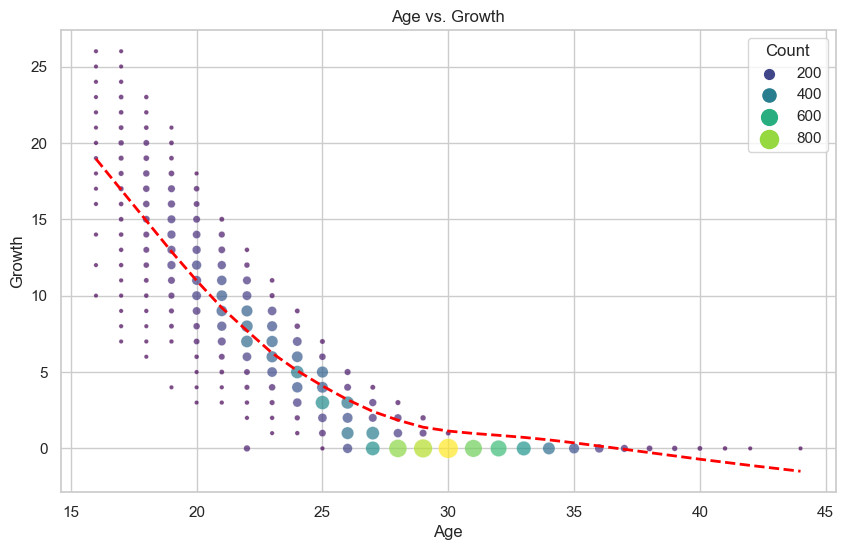

In [13]:
# Group the data by Age and Growth columns
grouped_AG = players.groupby(['Age', 'Growth']).size().reset_index(name='count')

# Create a scatter plot with Seaborn
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.scatterplot(data=grouped_AG, x="Age", y="Growth", size="count", sizes=(10, 200), hue="count", palette="viridis", alpha=0.7)

# Add a trendline (lowess)
sns.regplot(data=grouped_AG, x="Age", y="Growth", scatter=False, color="red", lowess=True, line_kws={"linewidth": 2, "linestyle": "--"})

plt.title("Age vs. Growth")
plt.xlabel("Age")
plt.ylabel("Growth")
plt.legend(title="Count")
plt.show()

The scatter plot effectively illustrates the relationship between Age and Growth, with the size of the dots representing the frequency of data points and the trendline helping estimate the general direction of this relationship. Several key insights can be drawn from this visualization:

**Age vs. Growth Trend:** The plot clearly reveals a negative correlation between Age and Growth. In other words, as players get older, their potential for growth decreases. This observation aligns with common knowledge in sports, where younger individuals often have more significant potential for improvement and development compared to older players.

**Age Concentration:** The most significant concentration of larger dots is observed in the age range of approximately 28 to 32. The largest dot at the age of 30 with a Growth of 0 suggests that around this age, players typically reach their peak performance and are less likely to experience growth in their abilities. This age range is often considered the prime of a footballer's career.

**Ceiling After Age 30**: An intriguing observation is the absence of Growth after the age of 30. This further reinforces the notion that, in the world of professional football, players tend to reach a performance plateau after entering their thirties. Their physical abilities may start to decline, and they may focus more on maintaining their current skill levels rather than experiencing growth.

In summary, this scatter plot and its analysis provide valuable insights into the relationship between age and growth in the context of football players. It highlights the general trend of declining growth as players get older, with the most significant concentration of growth occurring during the late twenties and early thirties before reaching a plateau in performance after the age of 30. These findings align with the typical trajectory of a footballer's career and underscore the importance of youth development in the sport.

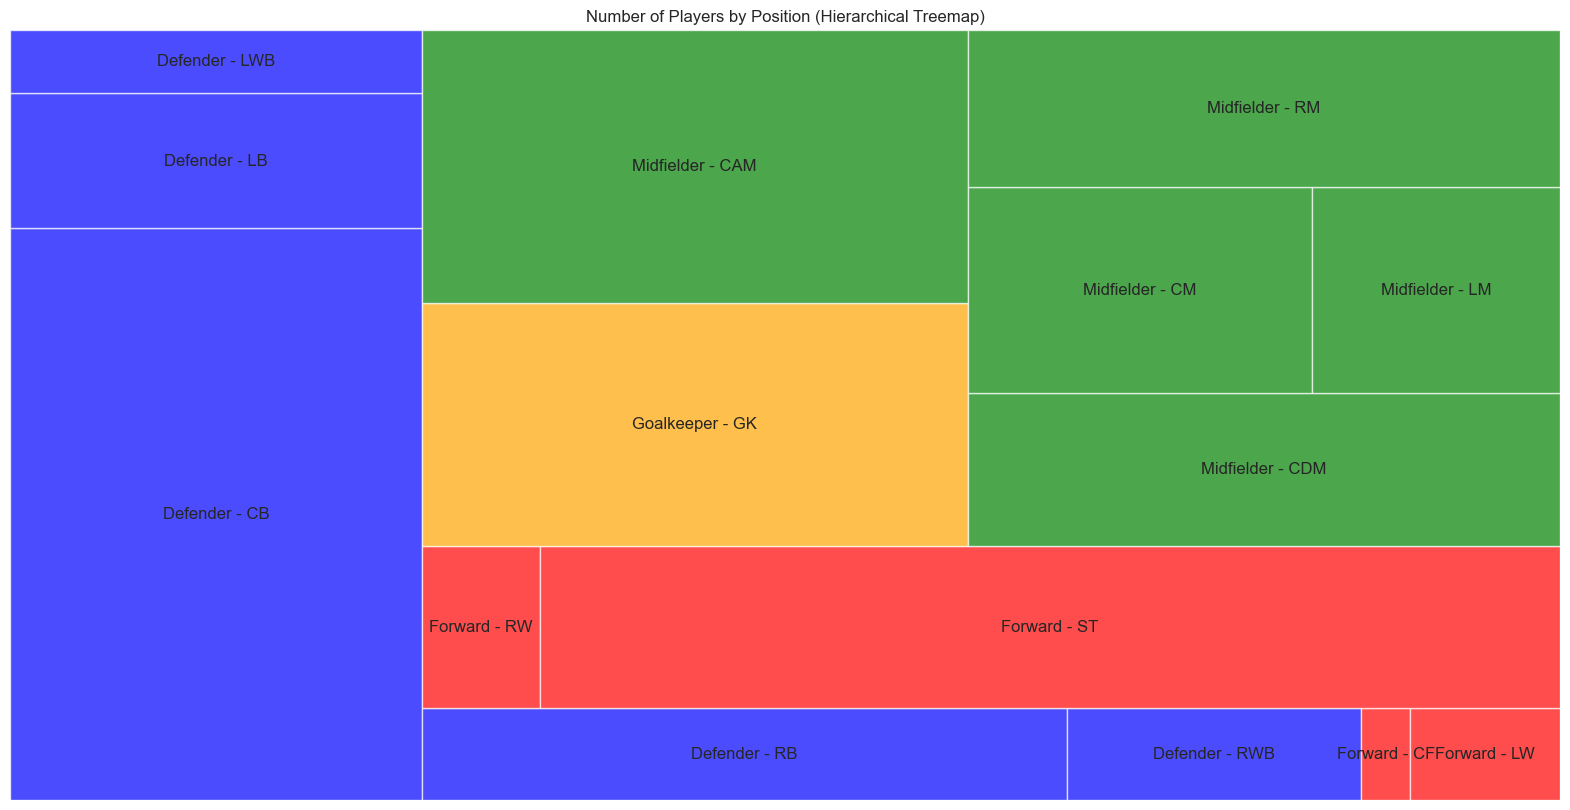

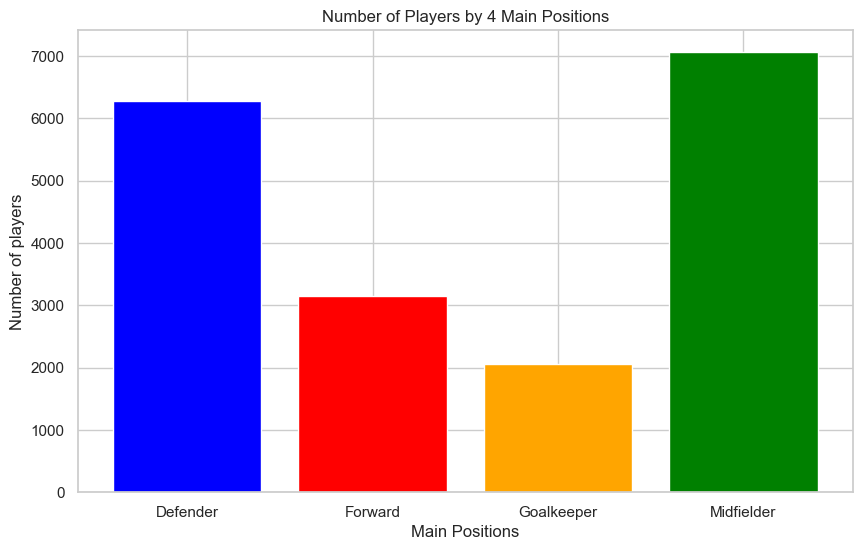

In [14]:
# Group the data by MainPosition and BestPosition, and count the number of players in each group
player_counts = players.groupby(['MainPosition', 'BestPosition']).size().reset_index(name='Count')

# Create a hierarchical treemap
plt.figure(figsize=(20, 10))
color_mapping = {'Goalkeeper': 'orange', 'Defender': 'blue', 'Midfielder': 'green', 'Forward': 'red'}
squarify.plot(sizes=player_counts['Count'], label=player_counts['MainPosition'] + " - " + player_counts['BestPosition'], color=[color_mapping[x] for x in player_counts['MainPosition']], alpha=0.7)
plt.axis('off')
plt.title('Number of Players by Position (Hierarchical Treemap)')
plt.show()

# Group the data by MainPosition and count the number of players in each group
player_counts = players.groupby('MainPosition').size().reset_index(name='Count')

# Create a bar chart
plt.figure(figsize=(10, 6))
color_order = {'Goalkeeper': 'orange', 'Defender': 'blue', 'Midfielder': 'green', 'Forward': 'red'}
position_order = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
plt.bar(player_counts['MainPosition'], player_counts['Count'], color=[color_order[x] for x in player_counts['MainPosition']])
plt.title('Number of Players by 4 Main Positions')
plt.xlabel('Main Positions')
plt.ylabel('Number of players')
plt.show()

The two visualizations, the treemap chart and the bar charts, provide valuable insights into the distribution of players by their main positions and their best positions. These observations can be related to modern football tactics and the evolution of the game.

1. **Distribution of Players by Main Position:**

**Midfielder (Over 7000 players):** The high number of players in the midfielder position reflects the increasing emphasis on midfield dominance in modern football. Midfielders play a crucial role in controlling the game, transitioning between defense and attack, and setting the tempo of play. Different subcategories (CAM, RM, CM, LM, CDM) within the midfield position allow for more specialized roles, aligning with the tactical diversity seen in modern football.

**Defender (Over 6000 players):** Within the defender category, the majority of players are center-backs (CB). This reflects the importance of strong and reliable central defenders in modern football. Many coaches prefer to build their defense around a solid central pairing, which may explain the prevalence of CBs.

**Forward (Over 3000 players):** The forward position includes various subcategories, but most players are categorized as strikers (ST). Strikers are responsible for scoring goals, and they remain a focal point in many teams' offensive strategies. The prevalence of STs reflects the ongoing emphasis on goal-scoring in the game.

**Goalkeeper (Around 2000 players):** The goalkeeper position is unique because there's typically only one goalkeeper in each starting lineup. This naturally limits the number of players in this position, and it's also a specialized role that requires unique skills. Goalkeepers play a pivotal role in protecting the goal area, which is essential for a team's defensive strategy.

2. **Modern Football Tactics and Player Roles:**

The prevalence of various midfield subcategories (CAM, RM, CM, LM, CDM) and center-backs (CB) highlights the tactical diversity in modern football. Teams often use multiple midfielders with distinct roles to control possession, press opponents, and create scoring opportunities. Center-backs are critical for defensive stability and building from the back.

The focus on goal-scoring is evident with the predominance of strikers (ST). Coaches continue to prioritize players who can convert goal-scoring opportunities, and goal-scorers often receive significant attention in team tactics.

The emphasis on technical and tactical aspects of the game is a shift from the past, where football might have been more focused on individual brilliance. Modern football values a collective approach, with players taking on specific roles and responsibilities within the team structure.

In summary, these visualizations reflect the evolving tactics in modern football, with an emphasis on teamwork, specialized roles, and strategic diversity. Coaches and teams are adapting to these changes to maximize their performance and achieve success in a highly competitive environment.

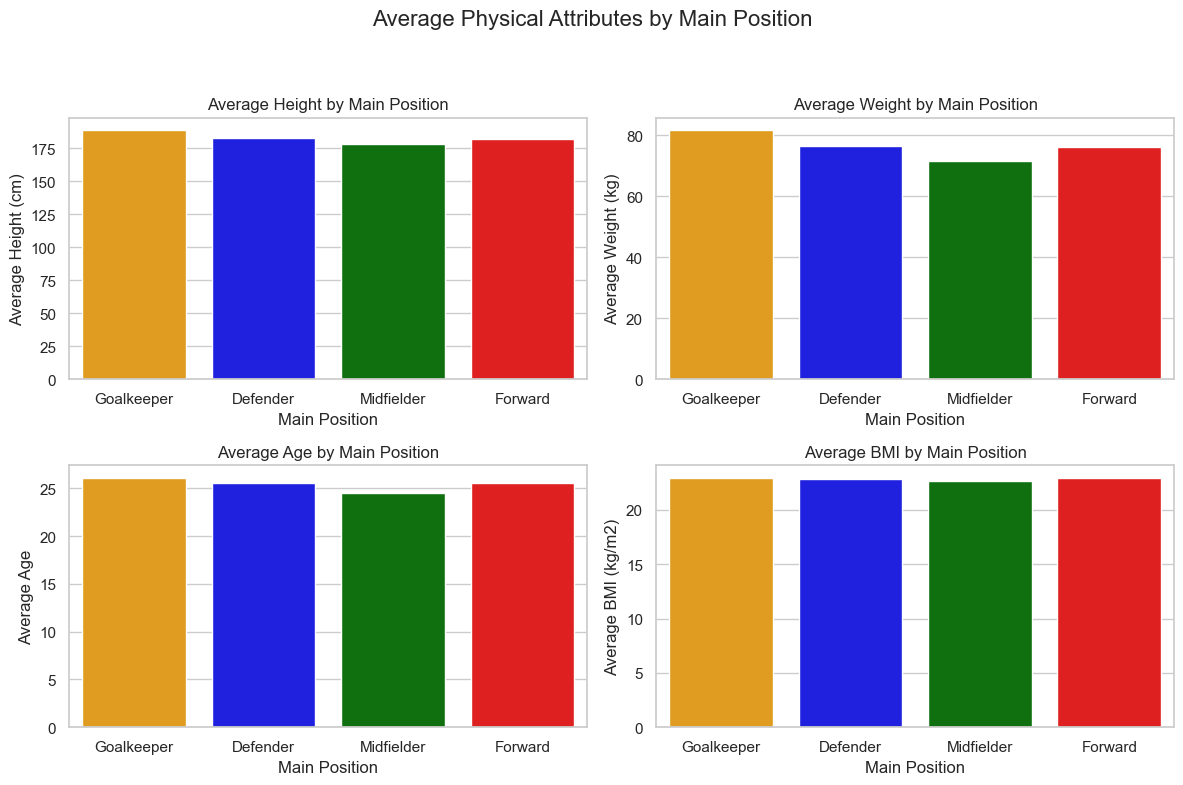

In [15]:
# Group the data by MainPosition and calculate the average values for each attribute
position_attributes = players.groupby('MainPosition')[['Height', 'Weight', 'Age', 'BMI']].mean().reindex(position_order)

# Create subplots with Seaborn and Matplotlib
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Average Physical Attributes by Main Position", fontsize=16)

# Bar chart for Height
sns.barplot(x=position_attributes.index, y=position_attributes['Height'], ax=axes[0, 0], palette=[color_order[x] for x in position_attributes.index])
axes[0, 0].set_title("Average Height by Main Position")
axes[0, 0].set_xlabel("Main Position")
axes[0, 0].set_ylabel("Average Height (cm)")

# Bar chart for Weight
sns.barplot(x=position_attributes.index, y=position_attributes['Weight'], ax=axes[0, 1], palette=[color_order[x] for x in position_attributes.index])
axes[0, 1].set_title("Average Weight by Main Position")
axes[0, 1].set_xlabel("Main Position")
axes[0, 1].set_ylabel("Average Weight (kg)")

# Bar chart for Age
sns.barplot(x=position_attributes.index, y=position_attributes['Age'], ax=axes[1, 0], palette=[color_order[x] for x in position_attributes.index])
axes[1, 0].set_title("Average Age by Main Position")
axes[1, 0].set_xlabel("Main Position")
axes[1, 0].set_ylabel("Average Age")

# Bar chart for BMI
sns.barplot(x=position_attributes.index, y=position_attributes['BMI'], ax=axes[1, 1], palette=[color_order[x] for x in position_attributes.index])
axes[1, 1].set_title("Average BMI by Main Position")
axes[1, 1].set_xlabel("Main Position")
axes[1, 1].set_ylabel("Average BMI (kg/m2)")

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

The bar chart subplots depicting the average values of four physical attributes (height, weight, age, and BMI) for soccer players in each of the four main positions (goalkeeper, defender, midfielder, and forward) provide several interesting insights:

1. **Midfielders:** Across all four physical attributes (height, weight, age, and BMI), midfielders consistently show the lowest average values. This suggests that midfielders, as a group, tend to be shorter, lighter, younger, and have a lower BMI compared to players in the other positions. This might be indicative of the role of midfielders, which often requires agility, speed, and ball control rather than physical stature.

2. **Goalkeepers:** On the contrary, goalkeepers consistently display the highest average values for all physical attributes. They tend to be taller, heavier, older, and have a higher BMI compared to players in other positions. This aligns with the requirements of the goalkeeper position, which necessitates a strong physical presence, reach, and experience.

3. **Defenders and Forwards:** The physical attributes of defenders and forwards are relatively similar. This indicates that, on average, players in these positions have physical characteristics that fall between those of midfielders and goalkeepers. Defenders and forwards may require a balance of physical attributes, including height, weight, age, and BMI, to fulfill their roles effectively.

These insights highlight the varying physical demands of different soccer positions. Goalkeepers are expected to excel in physical attributes like height and weight, while midfielders prioritize agility and speed over stature. Defenders and forwards, positioned between these two extremes, often require a well-rounded combination of physical attributes to succeed.

Coaches and teams use these insights to tailor their recruitment and training strategies, aligning them with the specific physical and tactical requirements of each position on the field.

In [16]:
position_BMI = players[['MainPosition','BMI']]
position_BMI

,MainPosition,BMI
0,Midfielder,23.458562
1,Forward,23.666910
2,Forward,23.666910
3,Midfielder,21.366869
4,Forward,22.038401
...,...,...
18534,Midfielder,22.460034
18535,Midfielder,19.591837
18536,Midfielder,22.491349
18537,Defender,20.515086


Create a new DataFrame position_BMI that contains only the MainPosition and BMI columns of the players DataFrame.

The purpose of this code is to analyze the distribution of BMI values for different positions in soccer. By isolating the MainPosition and BMI columns, it becomes easier to group the data by position and calculate summary statistics such as the mean and standard deviation of BMI for each position.

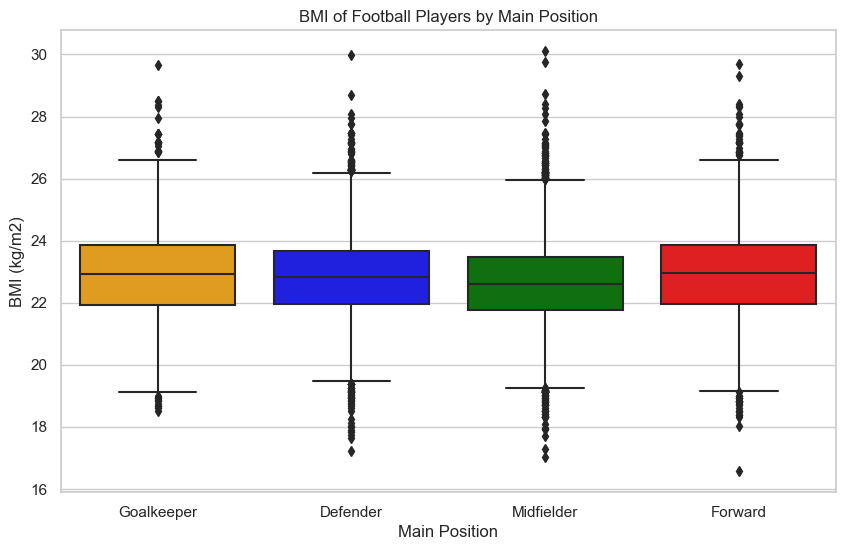

In [17]:
# Create a boxplot chart for BMI by MainPosition
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(data=players, x='MainPosition', y='BMI', order=position_order, palette=[color_order[x] for x in position_order])
plt.title("BMI of Football Players by Main Position")
plt.xlabel("Main Position")
plt.ylabel("BMI (kg/m2)")
plt.show()

a boxplot chart that visualizes the distribution of BMI values for soccer players in each of the four main positions (goalkeeper, defender, midfielder, and forward)

In [18]:
grouped_WHM = players.groupby(['Weight', 'Height', 'MainPosition']).size().reset_index(name='count')
grouped_WHM

,Weight,Height,MainPosition,count
0,49,162,Defender,1
1,53,170,Midfielder,1
2,54,163,Defender,1
3,54,165,Midfielder,2
4,54,178,Midfielder,1
...,...,...,...,...
2538,102,195,Forward,1
2539,102,206,Goalkeeper,1
2540,103,198,Goalkeeper,1
2541,104,191,Goalkeeper,2


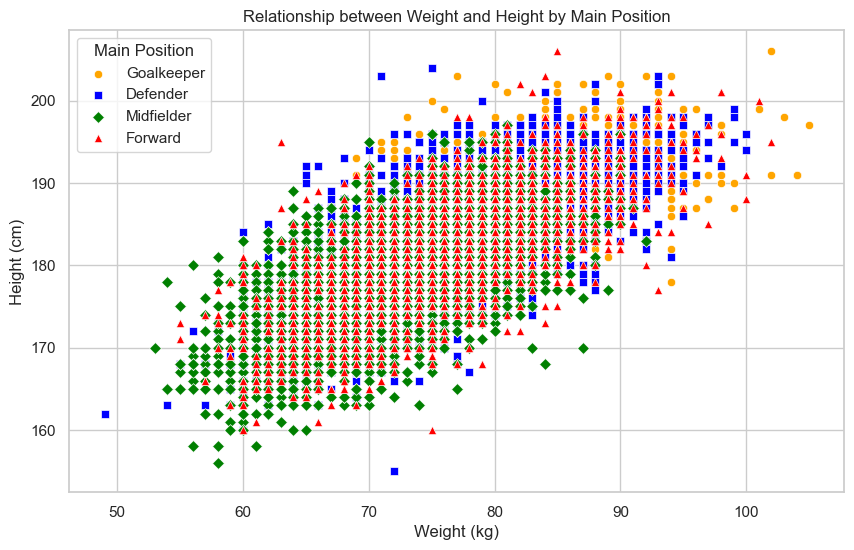

In [19]:
# Create a scatter plot for weight vs. height by MainPosition
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Define markers and colors for each MainPosition
markers = ['o', 's', 'D', '^']
colors = ['orange', 'blue', 'green', 'red']

# Loop through each MainPosition and plot the data with a unique marker and color
for i, position in enumerate(position_order):
    data = players[players['MainPosition'] == position]
    sns.scatterplot(data=data, x='Weight', y='Height', marker=markers[i], color=colors[i], label=position)

plt.title("Relationship between Weight and Height by Main Position")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.legend(title="Main Position")
plt.show()

The scatter plot revealing the relationship between Weight and Height by MainPosition provides several noteworthy insights:

1. **Weight and Height Concentration:** The majority of players in the dataset have weights ranging from 70 kg to 80 kg and heights between 175 cm to 185 cm. This concentration is likely indicative of the preferred range of physical attributes for soccer players, which allows for a balance between speed, agility, and strength.

2. **Midfielder Characteristics:** Midfielders stand out in this visualization as they tend to be shorter and lighter compared to players in other positions. The dense concentration of dots in the lower values for both weight and height suggests that midfielders are typically more compact in stature. This can be attributed to the role of midfielders, which often emphasizes quick ball control and agility.

3. **Other Positions:** In contrast, players in positions other than midfielders appear to be higher in both weight and height. This aligns with the physical demands of positions such as defenders, who need to win aerial duels and clearances, and forwards, who often play a more physical role in challenging defenders and goalkeepers.

4. **Physical Limits for Midfielders:** The absence of players in the Midfielder position above 200 cm in height and with a weight exceeding 100 kg highlights the practical physical limits for midfielders. These limits are likely due to the specific demands of the position, which require agility, ball control, and endurance. Extremely tall or heavy players may find it challenging to excel in midfield roles.

These insights emphasize the importance of physical attributes in soccer and how they vary across different positions. Coaches and scouts often consider these characteristics when recruiting players and creating lineups to optimize performance on the field. The balance between height, weight, speed, and skill is critical for player success in their designated positions.

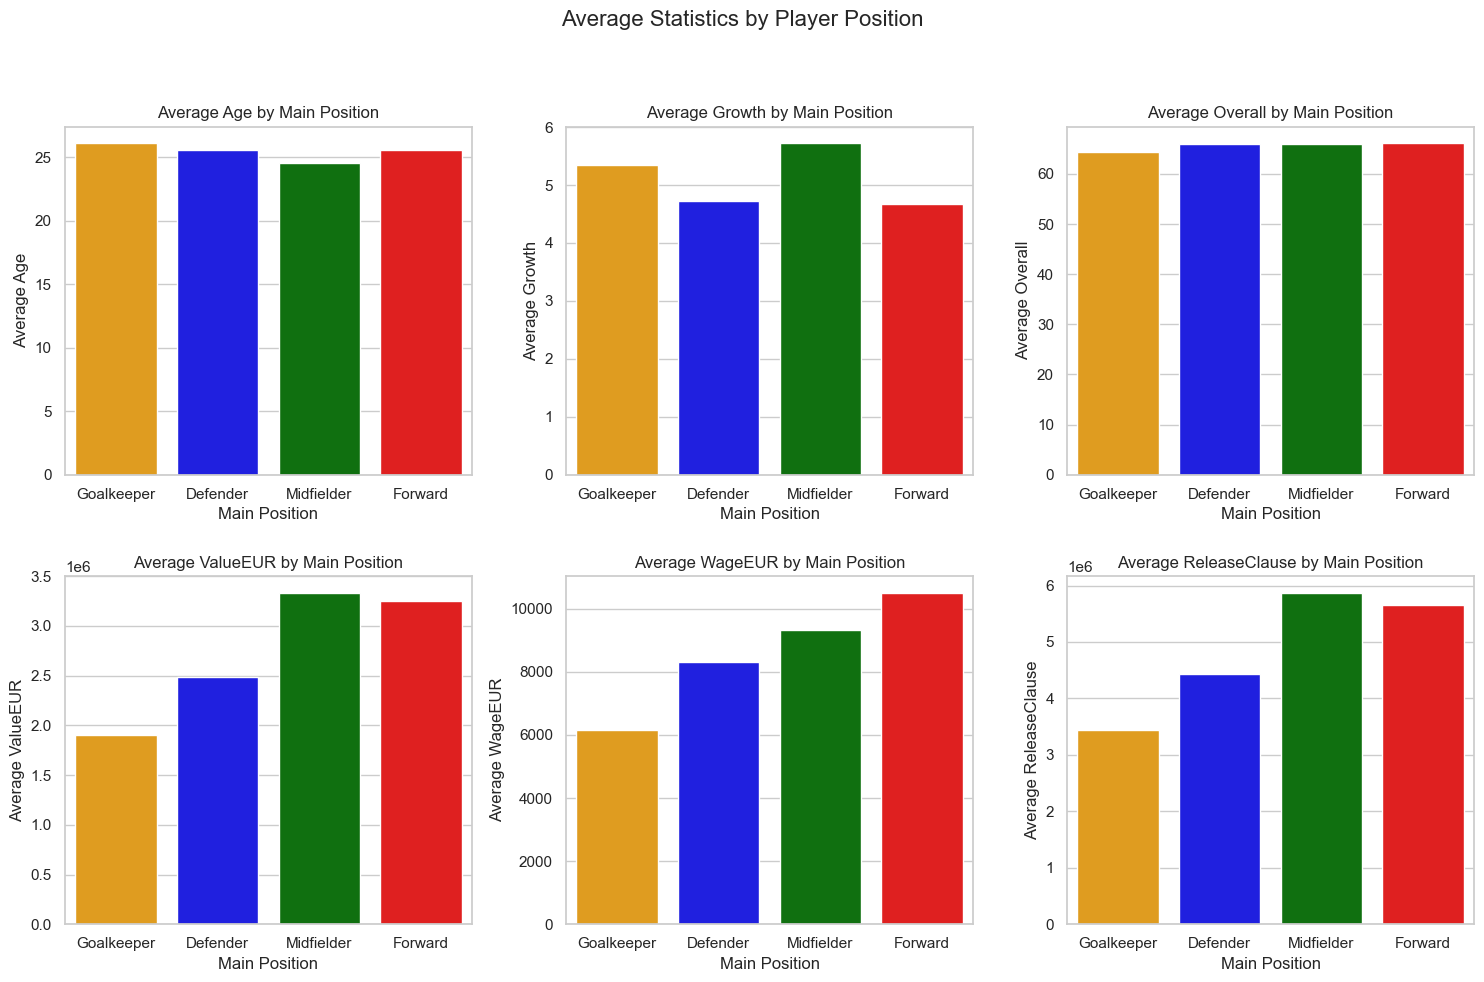

In [20]:
# Define the statistics to include in the bar charts
statistics = ['Age','Growth','Overall','ValueEUR','WageEUR','ReleaseClause']

# Create subplots for the bar charts
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Average Statistics by Player Position", fontsize=16)

# Loop through each statistic and create a bar chart
for i, stat in enumerate(statistics):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    
    # Group the data by MainPosition and calculate the average of the current statistic
    position_stats = players.groupby('MainPosition')[stat].mean().reindex(position_order)
    
    # Create the bar chart
    sns.barplot(x=position_stats.index, y=position_stats, ax=ax, palette=[color_order[x] for x in position_stats.index])
    ax.set_title(f"Average {stat} by Main Position")
    ax.set_xlabel("Main Position")
    ax.set_ylabel(f"Average {stat}")
    
# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

The chart showcasing average statistics by player position offers several notable insights into the distinctions between different positions in football:

1. **Age:**

Midfielders have the lowest average age, below 25. This suggests that midfielders tend to be younger compared to other positions. They often need to possess agility, stamina, and the ability to cover large areas of the field, which can be associated with a younger age group. In contrast, players in other positions tend to be slightly older.

2. **Growth:**

Goalkeepers and Midfielders have an average growth above 5, with Midfielders having the highest value. This implies that goalkeepers and midfielders are more likely to experience continued growth and improvement in their skills and performance. Forward and Defender players have growth below 5, suggesting they may reach their peak performance earlier in their careers.

3. **Overall:**

The average overall rating for all positions is around 65 points on a scale of 100. This suggests a relatively balanced distribution of player quality across different positions.

4. **ValueEUR:**

Midfielders and Forward players have the highest average values, above 3 million Euros. This can be attributed to the fact that these positions are typically more involved in goal-scoring opportunities and playmaking, making them more valuable in the transfer market. Defenders have an average value around 2.5 million Euros, while Goalkeepers have the lowest average value, below 2 million Euros, likely due to the limited transfer market value of goalkeepers compared to outfield players.

5. **WageEUR:**

Forward players have the highest average wages, exceeding 10,000 Euros, possibly due to their goal-scoring responsibilities and marketability. Midfielders are next with around 9,000 Euros, followed by Defenders with 8,000 Euros. Goalkeepers have the lowest average wages, around 6,000 Euros, reflecting the traditionally lower earning potential of goalkeepers compared to outfield players.

6. **ReleaseClause:**

Midfielders have the highest average release clauses, nearly 6 million Euros, indicating their perceived value and the cost of acquiring them. Forward players follow with around 5.5 million Euros, while Defenders have an average release clause of around 4.5 million Euros. Goalkeepers have the lowest average release clauses, around 3.5 million Euros, reinforcing the trend of goalkeepers being less expensive in the transfer market.

These insights reflect the unique roles and market values associated with each player position in football, with factors such as age, growth potential, overall performance, value, wage, and release clauses varying based on the specific demands of each position on the field.

In [21]:
nationalities = players['Nationality'].value_counts()
nationalities.head(20)

Nationality
England                1632
Germany                1204
Spain                  1074
France                  963
Argentina               937
Brazil                  728
Italy                   623
China PR                439
United States           437
Netherlands             428
Poland                  390
Sweden                  390
Republic of Ireland     385
Portugal                382
Norway                  373
Romania                 341
Saudi Arabia            331
Korea Republic          319
Denmark                 318
Belgium                 318
Name: count, dtype: int64

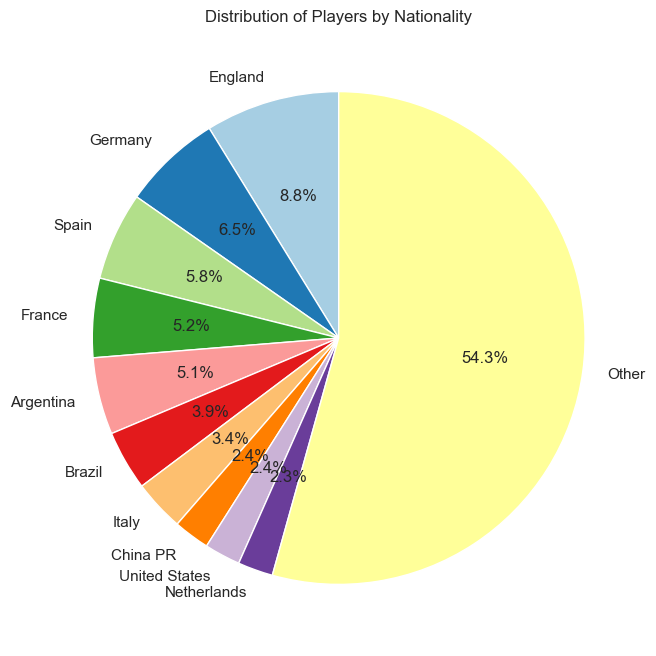

In [22]:
# Group the data by nationality and count the number of players from each nationality
nationality_counts = players['Nationality'].value_counts()

# Keep only the top N nationalities for better visualization
top_n = 10
other_count = sum(nationality_counts[top_n:])
nationality_counts = nationality_counts[:top_n]
nationality_counts['Other'] = other_count

# Define colors for each nationality
colors = plt.cm.Paired(range(len(nationality_counts)))

# Create a pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(nationality_counts, labels=nationality_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Distribution of Players by Nationality")

# Display the chart
plt.show()



The pie chart illustrating the distribution of players by nationality provides several key insights:

1. **European and South American Dominance:** The majority of players come from Europe and South America. England, Germany, Spain, France, Italy, the Netherlands, and other European countries collectively account for a substantial portion of the player population. Similarly, Argentina and Brazil, two prominent South American nations, also contribute significantly to the player base. This reflects the strong footballing traditions and talent pools in these regions.

2. **Global Appeal of Football:** The distribution of players from countries like China PR, the United States, and others highlights the global appeal of football. These countries have been investing in football development, and this is reflected in the presence of players from diverse backgrounds. The growing popularity of the sport in countries like China PR and the United States has contributed to their representation in the player population.

3. **Concentration in Traditional Football Powerhouses:** The representation of players from football powerhouses like England, Germany, Spain, and Brazil is significant. These countries have strong footballing infrastructures, well-established leagues, and a rich history of success in international competitions. As a result, they consistently produce a large number of talented players.

4. **Diverse and Inclusive Nature of Football:** The "Others" category, comprising 54.3% of players, underscores the inclusive and diverse nature of football. It indicates that players come from various countries and backgrounds, making football a truly global sport that transcends boundaries and cultures.

5. **Economic and Social Factors:** The distribution of players can also be influenced by economic and social factors. Countries with well-funded youth development programs and strong footballing traditions are more likely to produce a higher number of players. Additionally, factors such as accessibility to coaching and infrastructure, as well as the passion for the sport, play a role in determining player representation from different countries.

In summary, the pie chart highlights the global nature of football and the contributions of various nations to the sport. It reflects the historical prominence of Europe and South America in producing football talent while also showcasing the sport's increasing popularity and development in regions like Asia and North America. Football's universal appeal continues to make it one of the most widely played and watched sports worldwide.

In [23]:
players[['Nationality','ValueEUR']]

,Nationality,ValueEUR
0,Argentina,54000000
1,France,64000000
2,Poland,84000000
3,Belgium,107500000
4,France,190500000
...,...,...
18534,Republic of Ireland,110000
18535,China PR,90000
18536,Northern Ireland,130000
18537,Republic of Ireland,100000


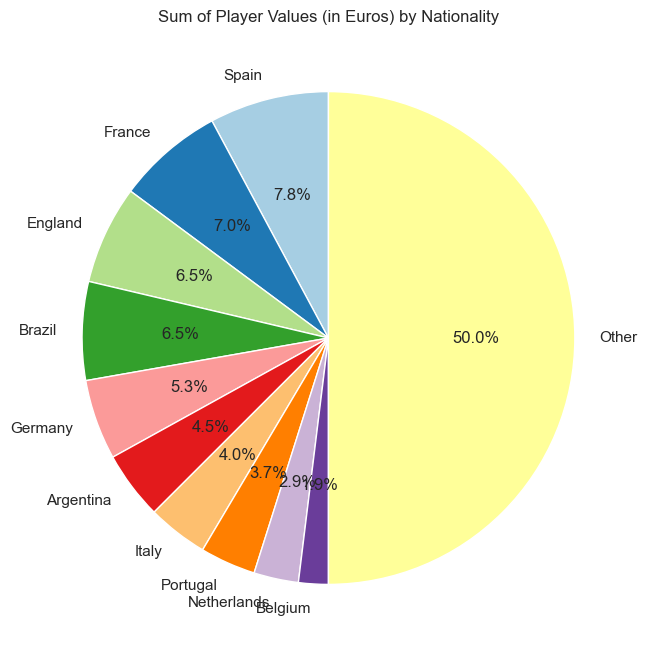

In [24]:
# Group the data by nationality and calculate the sum of the 'Value' column for each nationality
nationality_value = players.groupby('Nationality')['ValueEUR'].sum()

# Keep only the top N nationalities for better visualization
top_n = 10
other_value = nationality_value.nlargest(top_n).sum()
nationality_value = nationality_value.nlargest(top_n)
nationality_value['Other'] = other_value

# Define colors for each nationality
colors = plt.cm.Paired(range(len(nationality_value)))
                       
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(nationality_value, labels=nationality_value.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Sum of Player Values (in Euros) by Nationality")

# Display the chart
plt.show()

The pie chart representing the sum of player values (in Euros) by nationality provides several notable insights:

1. **Diversity of Nationalities:** The distribution of player values is diverse, with contributions from various nations. Spain, France, England, Brazil, Germany, Argentina, Italy, Portugal, the Netherlands, and Belgium all play significant roles in terms of player value.

2. **European and South American Influence:** European nations, such as Spain, France, England, Germany, Italy, Portugal, the Netherlands, and Belgium, continue to be prominent in the valuation of players. These countries have well-established footballing traditions and strong leagues, which contribute to the high total player values.

3. **South American Contribution:** Brazil and Argentina, two of the most well-known South American footballing nations, also feature prominently in player values. Their soccer academies have produced many highly-valued players who have made a significant impact on the global stage.

4. **Economic Factors:** Economic factors play a significant role in player valuation. European leagues, such as those in Spain, England, France, and Germany, often have higher financial resources, which can lead to greater player valuations. The investment in football development and infrastructure in these countries also plays a role.

5. **Globalization of Football:** The presence of a "50.0%" category labeled as "Others" highlights the globalization of football. It demonstrates that players from various nations worldwide contribute to the total player values, reflecting the increasing reach and popularity of the sport on a global scale.

In summary, this pie chart reveals the distribution of player values by nationality, emphasizing the influence of European and South American nations in the valuation of players. It underscores the importance of strong footballing traditions, well-funded leagues, and economic factors in determining player values while also reflecting the global and inclusive nature of the sport.

In [25]:
players[['Name', 'Club', 'ValueEUR', 'WageEUR']]

,Name,Club,ValueEUR,WageEUR
0,L. Messi,Paris Saint-Germain,54000000,195000
1,K. Benzema,Real Madrid CF,64000000,450000
2,R. Lewandowski,FC Barcelona,84000000,420000
3,K. De Bruyne,Manchester City,107500000,350000
4,K. Mbappé,Paris Saint-Germain,190500000,230000
...,...,...,...,...
18534,D. Collins,Sligo Rovers,110000,500
18535,Yang Dejiang,Guangzhou FC,90000,500
18536,L. Mullan,Derry City,130000,500
18537,D. McCallion,Derry City,100000,500


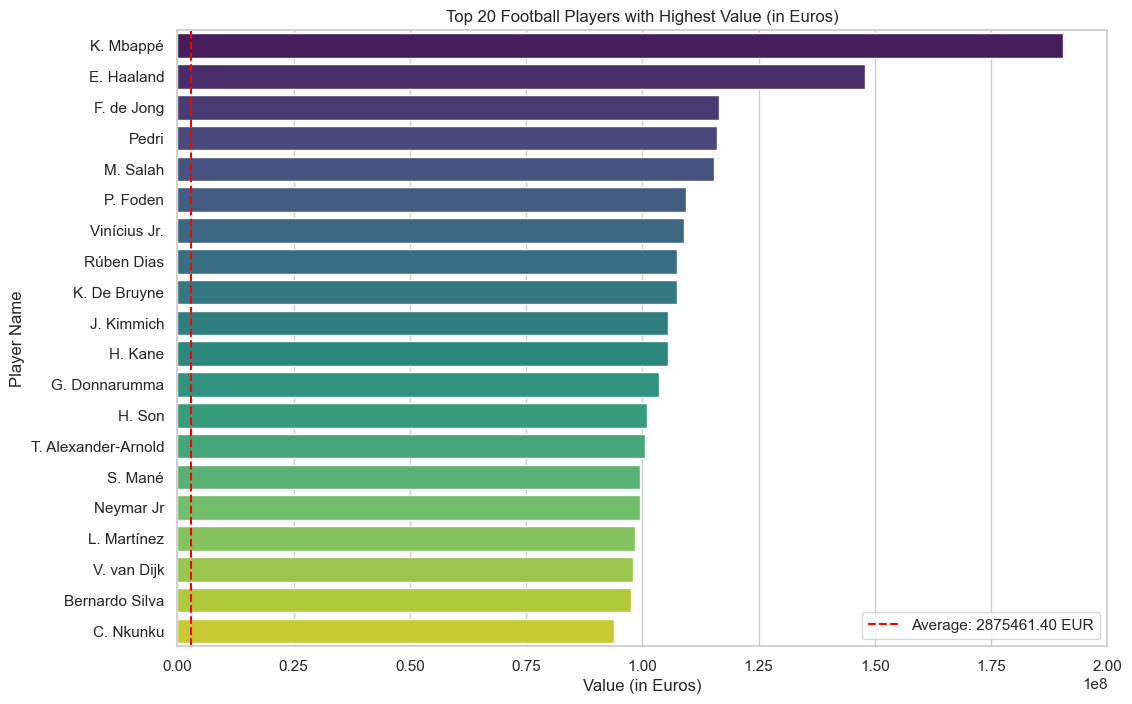

In [26]:
# Sort the players DataFrame by 'ValueEUR' column in descending order and select the top 20 players
top_players = players.sort_values(by='ValueEUR', ascending=False).head(20)

# Calculate the average value for all players
average_value = players['ValueEUR'].mean()

# Create a bar chart for the top 20 players
plt.figure(figsize=(12, 8))
sns.barplot(data=top_players, x='ValueEUR', y='Name', palette='viridis')

# Add a horizontal line for the average value
plt.axvline(x=average_value, color='red', linestyle='--', label=f'Average: {average_value:.2f} EUR')

plt.title("Top 20 Football Players with Highest Value (in Euros)")
plt.xlabel("Value (in Euros)")
plt.ylabel("Player Name")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend()  # Add a legend for the average line

# Display the chart
plt.show()

The bar chart displaying the top 20 football players with the highest value (in Euros) provides several insights into the footballing world:

1. **K. Mbappé's Exceptional Value:** Kylian Mbappé, with a value of 190.5 million Euros, stands out as the most valuable player. His high valuation reflects his extraordinary talent and performances. Mbappé is known for his incredible speed, dribbling ability, and goal-scoring prowess. He began his professional career at AS Monaco, where he helped the team win Ligue 1. He subsequently joined Paris Saint-Germain (PSG) and has continued to impress on both the domestic and international stages. His performances for France in the FIFA World Cup have solidified his status as one of the world's top players.

2. **Emerging Talent: Erling Haaland:** Erling Haaland's value of 148 million Euros places him as one of the most valuable young talents in the world. The Norwegian striker has attracted significant attention due to his exceptional goal-scoring ability and physical attributes. Haaland began his professional career at Molde FK and later joined RB Salzburg before moving to Borussia Dortmund. His performances in the Bundesliga and the UEFA Champions League have earned him recognition as one of the top prospects in world football.

3. **High Valuations for Elite Players:** The presence of several players with values around 100 million Euros indicates the robust market for top football talent. The top players have about 50 to 100 times more value than the average players (237,654,610 EUR). These players are typically established stars who have consistently performed at the highest levels for their respective clubs and national teams.

4. **Market Dynamics and Transfers:** Player valuations are influenced by a variety of factors, including club performance, international achievements, and transfer fees. High-profile transfers, such as those involving Mbappé and Haaland, often lead to substantial increases in a player's value. These transfers can be influenced by a player's contract situation, market demand, and the financial resources of the buying club.

5. **Historical Significance:** The chart reflects the continual evolution of the football market, with player values increasing over time. In recent years, player valuations have reached unprecedented levels, and clubs are willing to invest substantial sums to secure the services of top talent.

In summary, this chart showcases the high values associated with top football players, including established stars like Kylian Mbappé and emerging talents like Erling Haaland. The increasing financial investment in the sport and the competitive market for elite players have contributed to the high player valuations observed in the chart.

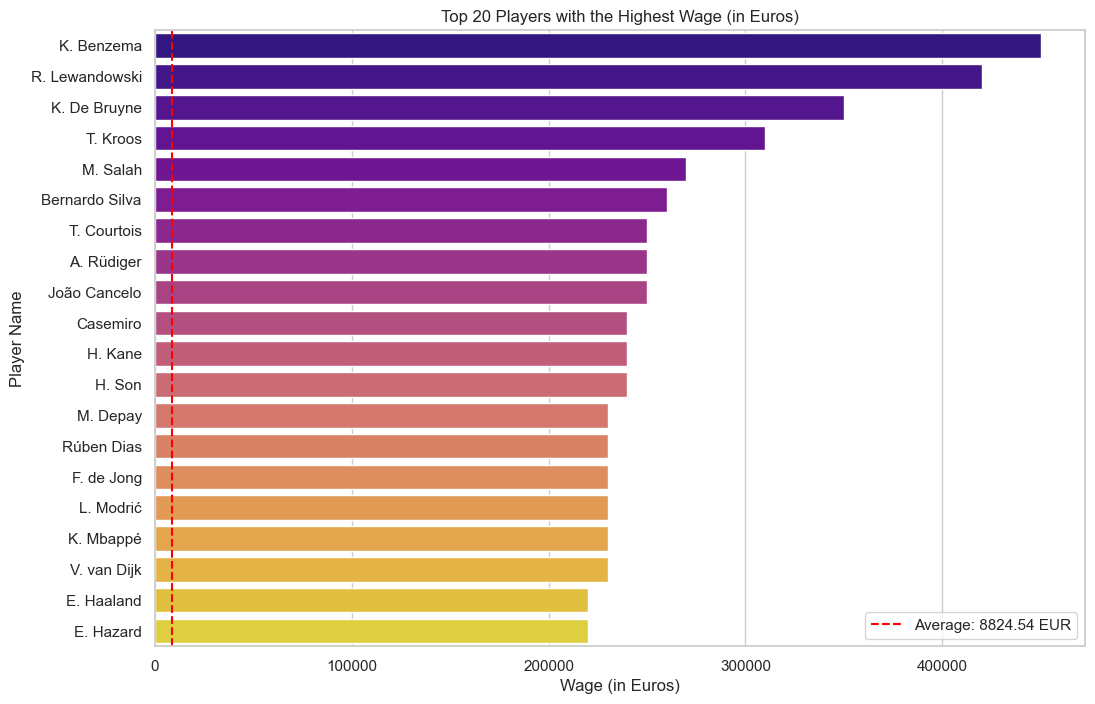

In [27]:
# Sort the players DataFrame by 'WageEUR' column in descending order and select the top 20 players
top_players_wage = players.sort_values(by='WageEUR', ascending=False).head(20)

# Calculate the average wage for all players
average_wage = players['WageEUR'].mean()

# Create a bar chart for the top 20 players with the highest wage
plt.figure(figsize=(12, 8))
sns.barplot(data=top_players_wage, x='WageEUR', y='Name', palette='plasma')

# Add a horizontal line for the average wage
plt.axvline(x=average_wage, color='red', linestyle='--', label=f'Average: {average_wage:.2f} EUR')

plt.title("Top 20 Players with the Highest Wage (in Euros)")
plt.xlabel("Wage (in Euros)")
plt.ylabel("Player Name")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend()  # Add a legend for the average line

# Display the chart
plt.show()

The bar graph displaying the top 20 players with the highest wages in Euros provides several notable insights:

1. **Top Earners:** K. Benzema and R. Lewandowski are the highest-paid players, with wages of approximately 450,000 Euros and 420,000 Euros, respectively. Both players have enjoyed outstanding careers, consistently performing at the highest level, which has led to lucrative contracts and endorsements.

2. **Wage Disparity:** The large gap between the wages of the top players and the rest of the top 20 players is striking. Players like K. Benzema and R. Lewandowski earn significantly more than the rest of the list. This wage disparity is a reflection of the unique value and marketability that elite players bring to their clubs and sponsors.

3. **Lowest Paid Players:** E. Haaland and E. Hazard, while among the top 20 highest earners, have comparatively lower wages of approximately 220,000 Euros. This demonstrates that even within the top echelon of players, there can be variations in wages based on factors like individual performance, contract negotiations, and the financial resources of their clubs.

4. **Wage Gap with Average Players:** The observation that the average wage of a player is around 8824.54 Euros highlights the significant wage gap between the top players and the average players in the game. Top players earn approximately 20 to 40 times more than the average players. This wage differential is driven by the unique skills, marketability, and performance of elite players, which make them highly sought after and justify their higher wages.

5. **Market Dynamics:** The significant variation in wages within the top 20 players underscores the complex market dynamics of football. Player wages are influenced by various factors, including club finances, competition for talent, individual performance, and endorsements. These factors result in variations in player earnings even among the top earners.

In summary, the graph highlights the substantial wage disparities among football players, with the top earners like K. Benzema and R. Lewandowski enjoying significantly higher wages than their peers. The fact that top players earn many times more than the average player reflects the value and market demand associated with the very best talents in the sport.

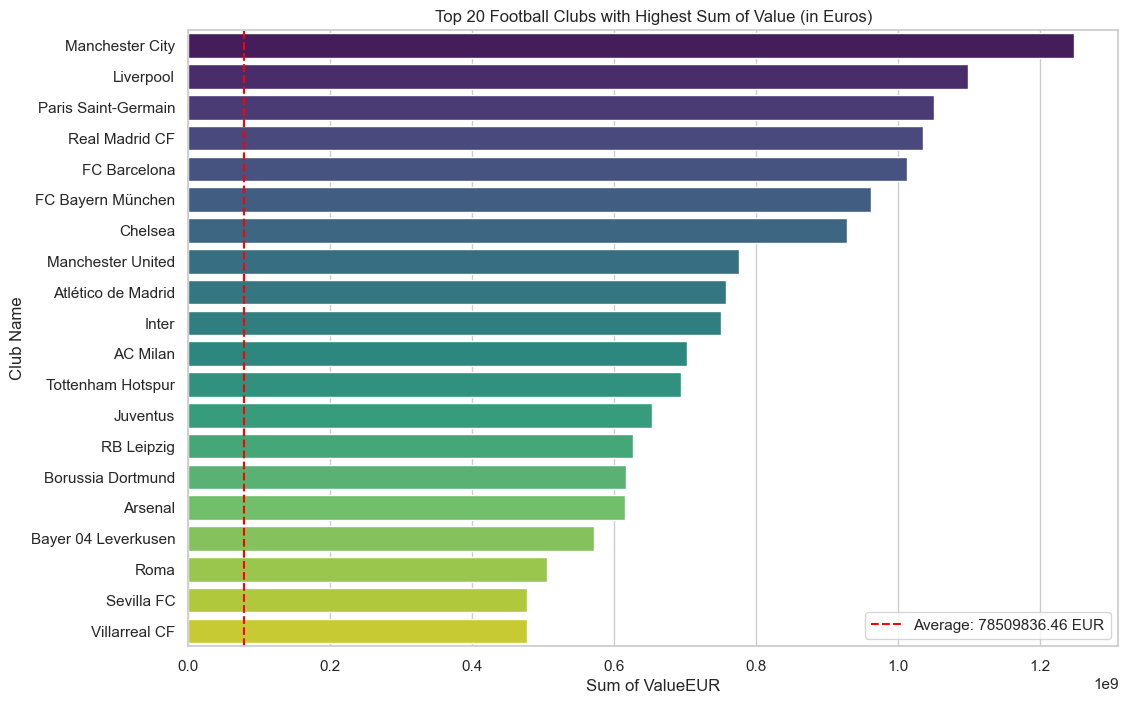

In [28]:
# Group the data by club and calculate the sum of 'ValueEUR' for each club
club_value_sum = players.groupby('Club')['ValueEUR'].sum().reset_index()

# Calculate the average value sum for all clubs
average_value_sum = club_value_sum['ValueEUR'].mean()

# Sort the clubs by the sum of 'ValueEUR' in descending order and select the top 20 clubs
top_20_clubs = club_value_sum.sort_values(by='ValueEUR', ascending=False).head(20)

# Create a horizontal bar chart for the top 20 clubs
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_clubs, x='ValueEUR', y='Club', palette='viridis')

# Add a horizontal line for the average value sum
plt.axvline(x=average_value_sum, color='red', linestyle='--', label=f'Average: {average_value_sum:.2f} EUR')

plt.title("Top 20 Football Clubs with Highest Sum of Value (in Euros)")
plt.xlabel("Sum of ValueEUR")
plt.ylabel("Club Name")
plt.legend()  # Add a legend for the average line

# Display the chart
plt.show()


The bar chart displaying the top 20 football clubs with the highest sum of value in Euros provides several key insights:

1. **Financial Dominance of Top Clubs:** Manchester City, Liverpool, and Paris Saint-Germain occupy the top positions with the highest club values, demonstrating their financial strength in the football world. These clubs have consistently achieved success on the pitch and have leveraged their strong financial positions to compete at the highest level.

2. **Variance in Club Values:** The chart illustrates a wide variance in club values within the top 20. Clubs like Manchester City, Liverpool, and Paris Saint-Germain boast values exceeding 1 billion Euros, while others, such as Roma, Sevilla FC, and Villarreal CF, have significantly lower values of approximately 500 million Euros. This variation is influenced by factors such as revenue streams, player assets, commercial partnerships, and financial stability.

3. **Significant Gap with Average Clubs:** The chart emphasizes the substantial gap between the values of the top clubs and the average club, which is indicated at around 78,509,836 Euros. This gap highlights the competitive advantage enjoyed by the top clubs in terms of attracting top talent, expanding their global fan base, and generating substantial revenue. The financial dominance of these top clubs reflects their ability to make major investments in player acquisitions, infrastructure, and marketing.

4. **Market Dynamics and Investment:** Club values are subject to market dynamics, including transfer fees, sponsorship deals, and broadcasting contracts. The top clubs consistently perform well both on and off the field, contributing to their high valuations. Their financial resources enable them to invest in world-class facilities, scout top talents, and strengthen their brand globally.

5. **Financial Impact on Competitiveness:** The financial disparities among clubs can have a significant impact on the competitive landscape of football. Top clubs can maintain their dominance through sustained investments and player acquisitions, while others may struggle to compete at the highest level due to financial constraints.

In summary, the chart underscores the significant financial disparities among football clubs, with a select few like Manchester City, Liverpool, and Paris Saint-Germain commanding the highest values. These clubs' financial strength positions them as major players in the global football landscape, allowing them to remain competitive and attract top talent.

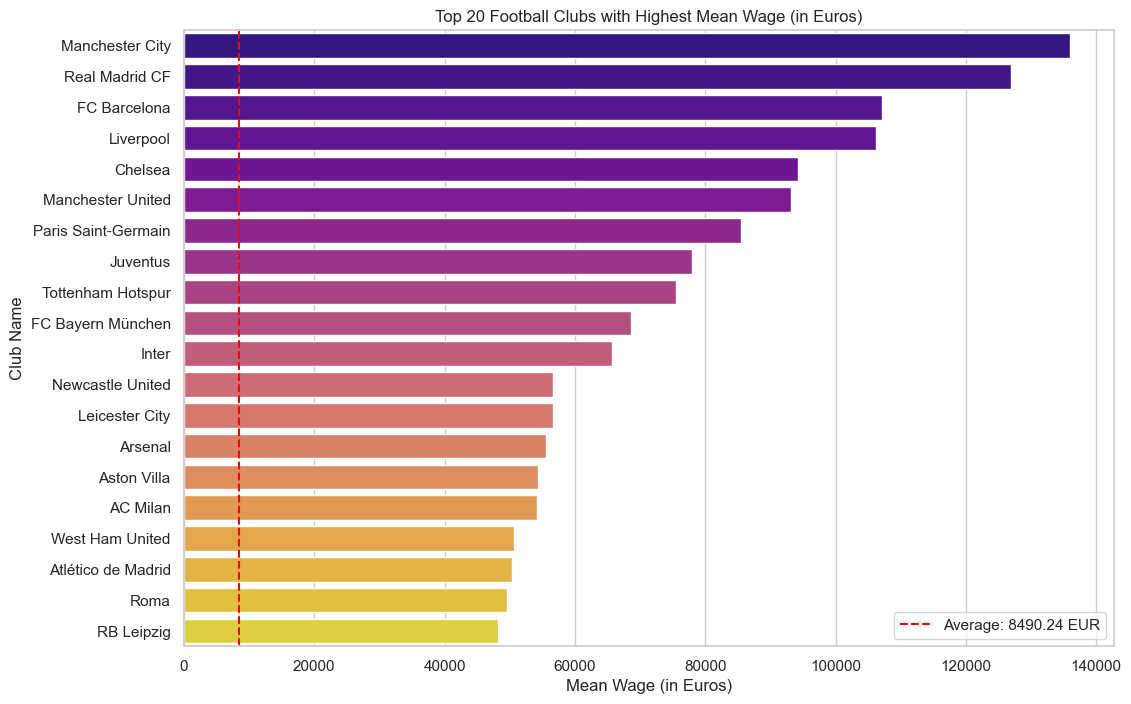

In [29]:
# Group the data by club and calculate the mean 'WageEUR' for each club
club_mean_wage = players.groupby('Club')['WageEUR'].mean().reset_index()

# Calculate the average mean wage for all clubs
average_mean_wage = club_mean_wage['WageEUR'].mean()

# Sort the clubs by the mean 'WageEUR' in descending order and select the top 20 clubs
top_20_clubs_wage = club_mean_wage.sort_values(by='WageEUR', ascending=False).head(20)

# Create a bar chart for the top 20 clubs with the highest mean wage
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_clubs_wage, x='WageEUR', y='Club', palette='plasma')

# Add a horizontal line for the average mean wage
plt.axvline(x=average_mean_wage, color='red', linestyle='--', label=f'Average: {average_mean_wage:.2f} EUR')

plt.title("Top 20 Football Clubs with Highest Mean Wage (in Euros)")
plt.xlabel("Mean Wage (in Euros)")
plt.ylabel("Club Name")
plt.legend()  # Add a legend for the average line

# Display the chart
plt.show()

The horizontal bar chart presenting the top 20 football clubs with the highest mean wage in Euros provides several key insights:

1. **Manchester City's Wage Dominance:** Manchester City leads the list with the highest mean wage, nearly 140,000 Euros. This reflects the club's significant financial resources and its ability to attract top talent by offering competitive wages. Manchester City's wage expenditure is indicative of its commitment to building a highly competitive squad.

2. **Variance in Mean Wages:** The chart illustrates a wide variance in mean wages within the top 20 clubs. While Manchester City commands the highest wage, clubs like RB Leipzig have significantly lower mean wages, around 50,000 Euros. This variance is influenced by factors such as club revenue, financial management, and the competitive landscape in their respective leagues.

3. **Significant Wage Gap with Average Clubs:** The chart highlights the substantial wage gap between the top clubs and the average club, with the average wage of a club indicated at approximately 8,490.24 Euros. This gap emphasizes the competitive advantage enjoyed by the top clubs in terms of attracting and retaining top talent. Top clubs pay their players about 4 to 14 times more than the average clubs, underlining the financial powerhouses' ability to offer competitive wages.

4. **Impact on Player Recruitment and Performance:** High mean wages among top clubs are often associated with their ability to attract star players and build successful squads. These clubs can afford to invest in top talent, which contributes to their on-field success and competitiveness.

5. **Market Dynamics and Financial Resources:** Mean wages are influenced by club financial resources, league competitiveness, and market dynamics. Clubs in more lucrative leagues or with strong commercial partnerships often have a financial advantage in offering competitive wages. Successful clubs can generate additional revenue through prize money, sponsorships, and merchandise sales, further enhancing their ability to offer higher wages.

In summary, the chart highlights the significant wage disparities among football clubs, with top clubs like Manchester City offering substantially higher mean wages compared to the average club. These financial powerhouses' capacity to pay top salaries contributes to their competitiveness and allows them to attract and retain top players, ultimately shaping their success on the field.

In [30]:
players[['AttackingWorkRate','DefensiveWorkRate']]

,AttackingWorkRate,DefensiveWorkRate
0,Low,Low
1,Medium,Medium
2,High,Medium
3,High,High
4,High,Low
...,...,...
18534,Medium,Medium
18535,Medium,Medium
18536,High,Medium
18537,Medium,Medium


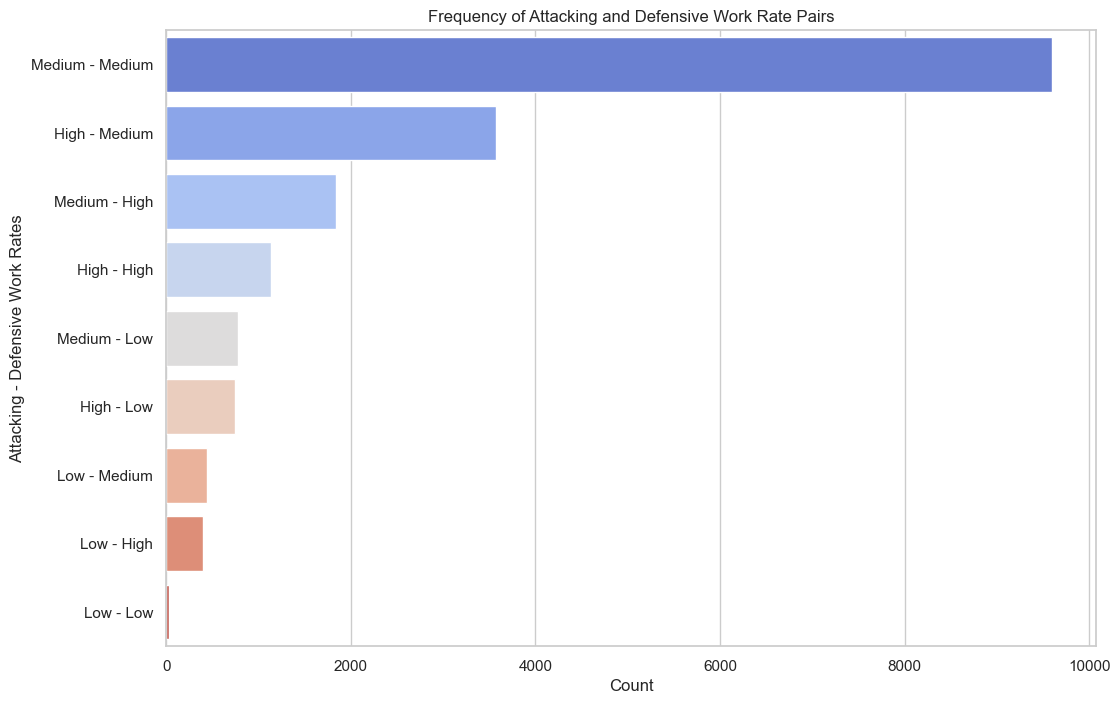

In [31]:
# Group the data by AttackingWorkRate and DefensiveWorkRate and count the number of players for each pair of values
work_rates = players.groupby(['AttackingWorkRate', 'DefensiveWorkRate']).size().reset_index(name='count')

# Create a new column that concatenates AttackingWorkRate and DefensiveWorkRate
work_rates['work_rates'] = work_rates['AttackingWorkRate'] + ' - ' + work_rates['DefensiveWorkRate']

# Sort the data by count in descending order
work_rates = work_rates.sort_values(by='count', ascending=False)

# Create a bar chart for the frequency of attacking and defensive work rate pairs
plt.figure(figsize=(12, 8))
sns.barplot(data=work_rates, y='work_rates', x='count', palette='coolwarm')
plt.title("Frequency of Attacking and Defensive Work Rate Pairs")
plt.xlabel("Count")
plt.ylabel("Attacking - Defensive Work Rates")

# Display the chart
plt.show()

The bar graph displaying the frequency of attacking and defensive work rate pairs provides several insights into the playing styles of footballers:

1. **Dominance of Medium-Medium Pair:** The most prevalent work rate pair is medium-medium, with an approximate frequency of 9600. This indicates that a significant number of footballers exhibit a balanced approach, contributing both to attacking and defensive aspects of the game. Players with medium-medium work rates are versatile and can engage in both offensive and defensive duties, making them valuable assets on the field.

2. **Variety in Work Rate Combinations:** The graph showcases a range of work rate pairs, including high-medium, medium-high, and high-high pairs. These combinations suggest diverse playing styles among footballers, with some prioritizing offensive contributions, some emphasizing defensive responsibilities, and others striking a balance between the two. The presence of different work rate pairs reflects the variety of roles and playing philosophies in modern football.

3. **Low-Low Pair as the Least Frequent:** The low-low work rate pair has the lowest frequency. This suggests that footballers with a minimal inclination toward both attacking and defensive duties are less common. Players with low-low work rates may be more specialized in a specific aspect of the game or may have a more limited involvement in both attacking and defensive phases.

4. **Influence on Team Tactics and Strategy:** The distribution of work rate pairs can have implications for team tactics and strategy. Teams with a majority of medium-medium work rate pairs may adopt a balanced and adaptable style of play. Conversely, teams with a higher frequency of high-high pairs may prioritize an aggressive, attacking approach, while those with low-low pairs might focus on defensive solidity and specialization.

5. **Player Versatility and Adaptability:** The prevalence of medium-medium pairs suggests that versatility and adaptability are highly valued traits in modern football. Players who can seamlessly transition between attacking and defensive roles contribute to team flexibility and can fulfill multiple positions depending on tactical requirements.

In summary, the bar graph reveals the frequency distribution of attacking and defensive work rate pairs, showcasing the prevalence of the medium-medium pair and the diversity of playing styles among footballers. The insights from this graph contribute to understanding the dynamics of team composition, player roles, and strategic approaches in the ever-evolving landscape of football.

In [32]:
players[['Name', 'BestPosition','MainPosition','Overall',
    'PaceTotal', 'ShootingTotal', 'PassingTotal',
    'DribblingTotal','DefendingTotal', 'PhysicalityTotal']]

,Name,BestPosition,MainPosition,Overall,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,L. Messi,CAM,Midfielder,91,81,89,90,94,34,64
1,K. Benzema,CF,Forward,91,80,88,83,87,39,78
2,R. Lewandowski,ST,Forward,91,75,91,79,86,44,83
3,K. De Bruyne,CM,Midfielder,91,74,88,93,87,64,77
4,K. Mbappé,ST,Forward,91,97,89,80,92,36,76
...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,CAM,Midfielder,47,68,48,43,51,31,33
18535,Yang Dejiang,CDM,Midfielder,47,55,37,41,47,48,39
18536,L. Mullan,RM,Midfielder,47,64,40,49,52,37,35
18537,D. McCallion,CB,Defender,47,52,24,25,32,52,41


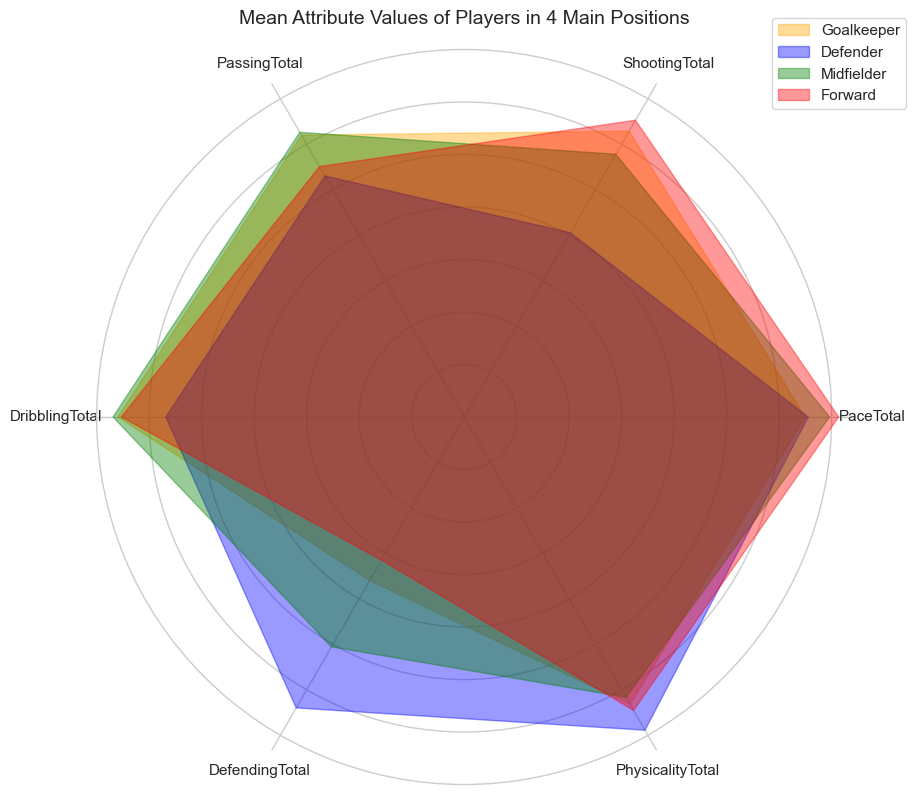

In [33]:
# Define the attributes and their order
attributes = ['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
              'DefendingTotal', 'PhysicalityTotal']

# Define the positions and their colors
positions = position_order
colors = [color_order[position] for position in positions]

# Create a radar chart
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)
ax.set_xticks(np.arange(len(attributes)) * (2 * np.pi) / len(attributes))
ax.set_xticklabels(attributes)
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)

for position, color in zip(positions, colors):
    data = players[players['MainPosition'] == position]
    mean_values = data[attributes].mean().values
    mean_values = np.concatenate((mean_values, [mean_values[0]]))
    
    ax.fill(np.linspace(0, 2 * np.pi, len(attributes) + 1), mean_values, alpha=0.4, color=color, label=position)

plt.title('Mean Attribute Values of Players in 4 Main Positions', size=14)
plt.legend(positions, loc=(0.9, 0.9))
plt.show()

The radar chart comparing mean attribute values across four main football positions—Goalkeeper, Defender, Midfielder, and Forward—offers valuable insights into the distinct skill sets of players in each position:

1. **Midfielders' Uniform Attributes:** The observation that midfielders have the most uniform attributes in all aspects suggests that players in this position are well-rounded and contribute consistently across various soccer abilities. This versatility is a key characteristic, allowing midfielders to influence the game both defensively and offensively.

2. **Defenders' Strength in Defending and Physicality:** Defenders stand out with the highest mean attribute values in defending and physicality. This reinforces the traditional role of defenders as players who excel in stopping opponents and engaging in physical battles. Their defensive prowess contributes to the overall stability of the team's backline.

3. **Forwards' Emphasis on Shooting and Pace:** Forwards showcase the highest mean attribute values in shooting and pace abilities. This aligns with the expectations for players in the forward position, where scoring goals and utilizing speed to create goal-scoring opportunities are crucial. The emphasis on shooting and pace reflects the offensive nature of the forward role.

4. **Trade-Off Between Abilities:** The radar chart highlights a trade-off between different abilities, indicating that no single position dominates all axes. This reflects the specialization and unique roles associated with each position. For instance, goalkeepers may have lower mean attribute values in pace, emphasizing their focus on shot-stopping and goalkeeping skills. Similarly, forwards may have lower mean attribute values in defending, as their primary role is goal-scoring rather than defensive duties.

5. **Strategic Implications for Team Composition:** Coaches and team managers can use the insights from the radar chart to strategically compose their teams. Understanding the strengths and weaknesses associated with each position helps in player selection, formation planning, and overall team strategy.

In summary, the radar chart provides a comprehensive view of mean attribute values across key soccer abilities for different player positions. The trade-offs and specialized skill sets associated with each position underscore the complexity and strategic considerations involved in team composition and player roles in football.

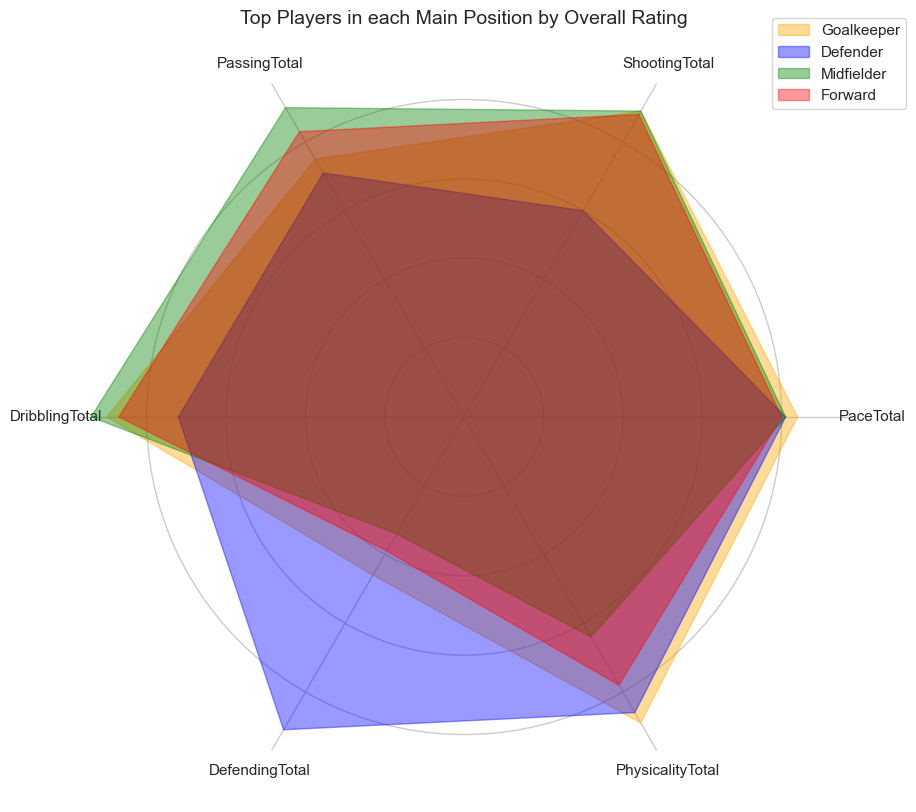

In [34]:
# Create a radar chart
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)
ax.set_xticks(np.arange(len(attributes)) * (2 * np.pi) / len(attributes))
ax.set_xticklabels(attributes)
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)

for position, color in zip(positions, colors):
    data = players[players['MainPosition'] == position]
    idx = data['Overall'].idxmax()
    player_data = data.loc[idx]
    player_values = player_data[attributes].values
    player_values = np.concatenate((player_values, [player_values[0]]))
    
    ax.fill(np.linspace(0, 2 * np.pi, len(attributes) + 1), player_values, alpha=0.4, color=color, label=player_data['Name'])

plt.title('Top Players in each Main Position by Overall Rating', size=14)
plt.legend(positions, loc=(0.9, 0.9))
plt.show()

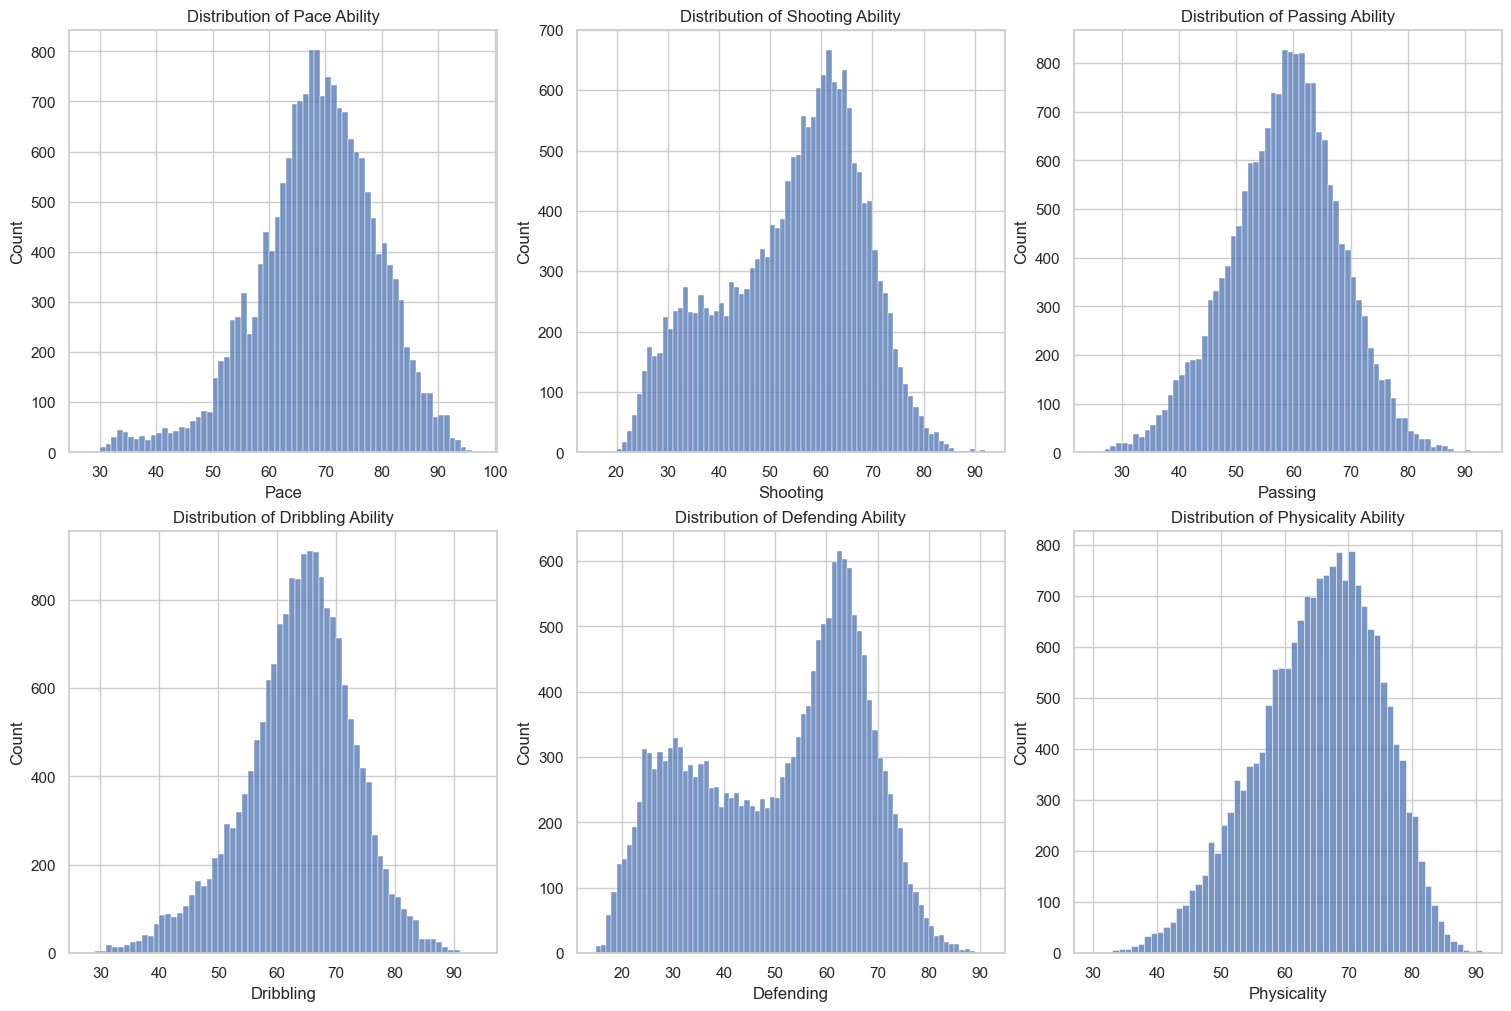

In [35]:
# Plot the distribution of each variable
fig, axs = plt.subplots(2, 3, figsize=(15, 10), constrained_layout=True)
attributes = ['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
for i, a in enumerate(attributes):
    row, col = divmod(i, 3)
    bins = np.arange(int(players[a].min()), int(players[a].max() + 1), 1)
    ax=axs[row,col]
    sns.histplot(players[a], kde=False, bins=bins, ax = ax)
    ax.set_title(f"Distribution of {a.replace('Total','')} Ability")
    ax.set_xlabel(f"{a.replace('Total','')}")
plt.show()

The histograms depicting the distribution of football abilities, such as pace, shooting, passing, dribbling, defending, and physicality, provide valuable insights into the variations and characteristics of player skills:

1. **Normal Distribution Patterns:** The approximately bell-shaped histograms across different abilities indicate a normal distribution in each case. This suggests that, on average, most players have scores around the mean, while fewer players exhibit either very high or very low scores. The normal distribution is a common pattern in statistical data and implies a balanced distribution of abilities among football players.

2. **Symmetry and Skewness Differences:** The variations in shapes and peaks among the histograms highlight differences in the distribution patterns of specific abilities. For instance, the passing histogram is described as more symmetrical with a single peak, indicating that passing abilities are more consistent and evenly distributed among players. In contrast, the defending histogram is noted as more skewed to the right with two peaks, suggesting that defending abilities exhibit greater variability and may be influenced by distinct subgroups of players.

3. **Bimodal Nature of Defending Ability:** The presence of two peaks in the defending histogram suggests a bimodal distribution. This indicates the existence of two distinct groups of players with different levels of defending ability. The bimodal nature may be attributed to specialized roles within the defending position, such as center-backs and full-backs, each having unique defensive attributes and contributing to the observed distribution.

4. **Implications for Player Evaluation and Team Strategy:** Coaches and team analysts can use these insights to better understand the distribution of abilities within their squads. Recognizing the normal distribution patterns and variations in skewness can inform player evaluation processes, helping teams identify areas of strength and potential areas for improvement. It also aids in developing strategic approaches that leverage the diverse skill sets present within the team.

5. **Focus on Consistency and Variability:** The observations about passing ability being more consistent and normally distributed, while defending ability is more variable and bimodal, highlight the importance of considering the nature of each ability. Teams may prioritize consistent and evenly distributed abilities in certain positions, while acknowledging and strategizing around the variability and specialization observed in other positions.

In summary, the histograms provide a visual representation of the distribution of football abilities, offering insights into the normality, symmetry, skewness, and bimodal nature of these distributions. This information can be valuable for teams and coaches in player assessment, team composition, and strategic decision-making in the world of football.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


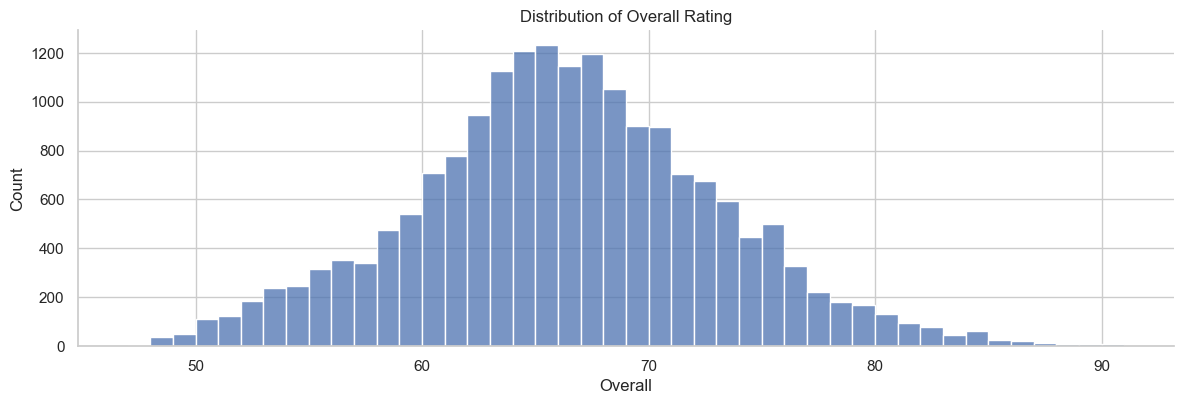

In [36]:
bins_Overall = np.arange(int(players['Overall'].min()), int(players['Overall'].max() + 1), 1)
sns.displot(players['Overall'], kde=False, bins = bins_Overall, height = 4, aspect = 3)
plt.title('Distribution of Overall Rating')
plt.show()

The histogram displaying the distribution of overall ratings among soccer players provides several noteworthy insights into the skill levels and abilities within the player population:

1. **Normal Distribution and Central Tendency:** The observation that the data appears to be normally distributed with a mean around 66 and a standard deviation of around 10 suggests that the majority of soccer players exhibit average skills and abilities. The normal distribution is a common pattern in datasets, indicating a balanced distribution around the mean.

2. **Concentration of Ratings:** The concentration of ratings between 60 and 75 signifies that most players fall within this range, emphasizing the prevalence of players with average skills. This range likely represents a broad segment of players who contribute consistently to their teams without necessarily standing out as exceptional or below average.

3. **Majority of Players Have Average Skills:** The fact that the majority of ratings fall within the 60 to 75 range reinforces the idea that most soccer players possess average skills and abilities. This aligns with the expectation that a substantial portion of the player population contributes at a competitive and reliable level.

4. **Outliers Indicate Exceptional and Poor Performances:** The presence of outliers on both the lower and higher ends of the spectrum suggests that there are players with exceptional as well as below-average skills and abilities. These outliers could represent star players with outstanding performances or players who may be struggling to meet the average standards.

5. **Skill Disparities Across the Spectrum:** The spread of ratings across the entire spectrum implies that there is considerable variability in skill levels within the soccer player population. While most players fall within the average range, the outliers highlight the existence of players who significantly excel or lag behind in their overall abilities.

6. **Team Composition Considerations:** Teams and coaches can use this distribution information to assess the overall skill composition of their squads. Understanding the prevalence of average players, as well as the presence of exceptional and less skilled players, can inform team selection, player development strategies, and overall team dynamics.

In summary, the histogram provides a visual representation of the distribution of overall ratings among soccer players, showcasing a normal distribution with a concentration of ratings in the average range. The outliers at both extremes draw attention to players with exceptional or below-average skills, adding a layer of complexity to the overall skill landscape within the soccer player population.

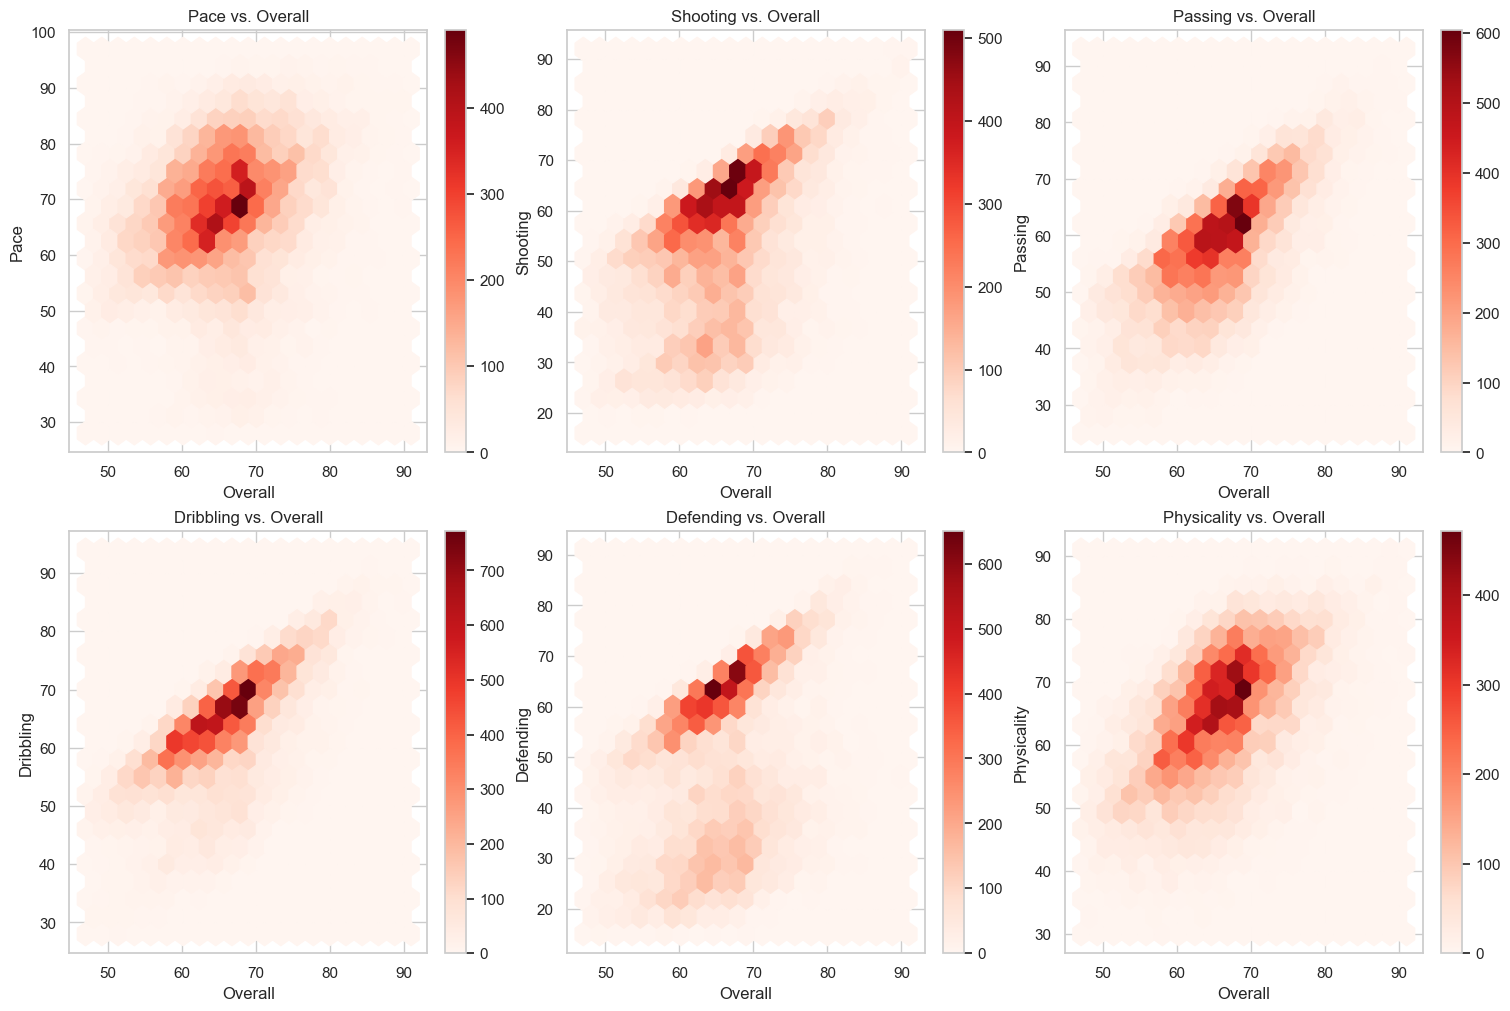

In [37]:
# Create Hexbin plots for each attribute of the players vs. Overall rating
fig, axs = plt.subplots(2, 3, figsize=(15, 10), constrained_layout=True)
attributes = ['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
for i, a in enumerate(attributes):
    row, col = divmod(i, 3)
    ax = axs[row, col]
    players.plot(kind='hexbin', x='Overall', y=a, gridsize=20, cmap='Reds', ax=ax)
    ax.set_title(f"{a.replace('Total','')} vs. Overall")
    ax.set_ylabel(f"{a.replace('Total','')}")
plt.show()

The hexbin plots providing insights into the relationship between overall ratings and specific skill ratings for various football abilities offer several key observations:

1. **Positive Correlation Across Skills:** The consistent positive correlation between overall ratings and specific skill ratings across all six football abilities indicates that, on average, as a player's overall rating increases, their proficiency in individual skills also tends to increase. This aligns with the expectation that higher-rated players excel across multiple aspects of the game.

2. **Varied Strengths of Correlation:** The variation in the strength of correlation among skills suggests that some skills have a more pronounced impact on the overall rating than others. The strong correlation between overall rating and shooting skill implies that shooting prowess significantly contributes to a player's overall effectiveness on the field. In contrast, the weaker correlation with pace suggests that pace may have a less decisive influence on the overall rating.

3. **Diversity in Player Profiles:** The wide range of variation in specific skill ratings for players with similar overall ratings highlights the diversity in player profiles. For instance, players with an overall rating of 80 can exhibit considerable variation in their passing skill ratings, ranging from 60 to 90. This diversity indicates that players with similar overall ratings can have distinct strengths and weaknesses in specific areas of the game.

4. **Individualized Player Strengths and Weaknesses:** The existence of players with similar overall ratings but differing skill ratings emphasizes that each player possesses unique strengths and weaknesses. Some players may excel in passing, while others may prioritize shooting or other skills. This individualization contributes to the richness and complexity of player profiles in football.

5. **Identification of Player Types:** The hexbin plots provide a tool for identifying different player types based on their specific skill ratings. For example, players clustered along the upper end of the shooting skill rating spectrum may be identified as prolific goal scorers. In contrast, the scattered points in the pace skill rating plot suggest that pace may be a less defining factor in distinguishing player types.

6. **Implications for Team Strategy and Player Recruitment:** Teams and managers can leverage these insights to formulate strategies that align with the specific strengths and weaknesses of their players. Understanding the nuanced relationships between overall ratings and individual skills allows for targeted recruitment and tactical planning based on the team's desired style of play.

In summary, the hexbin plots provide a nuanced view of the relationship between overall ratings and specific skill ratings, revealing both common trends and individual variations among players. This information aids in understanding player diversity, identifying key contributors to overall effectiveness, and tailoring team strategies to capitalize on the unique strengths of individual players.

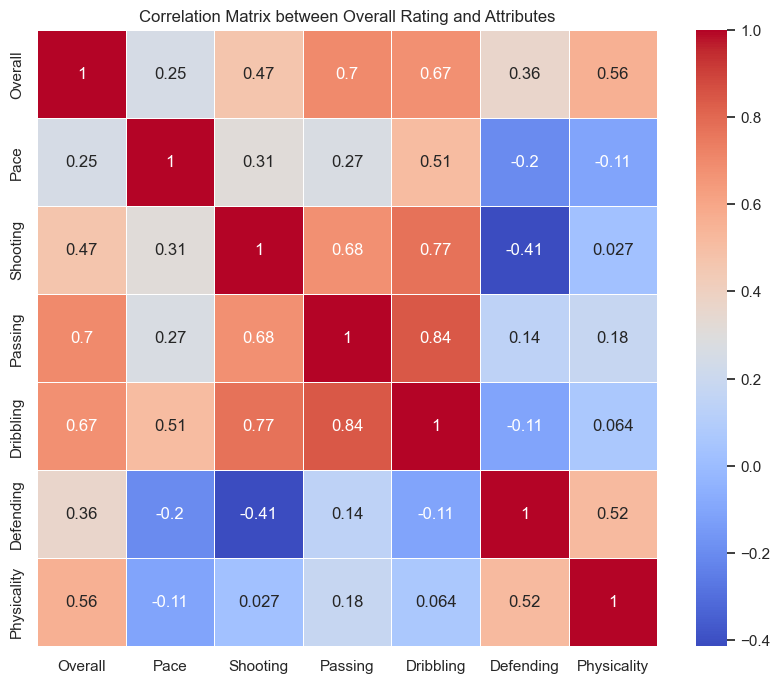

In [38]:
# Define the labels for the attributes
new_labels = ['Overall', 'Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']

# Calculate the correlation matrix
corr = players[['Overall', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
           'DefendingTotal', 'PhysicalityTotal']].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1)
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, xticklabels=new_labels, yticklabels=new_labels)
plt.title("Correlation Matrix between Overall Rating and Attributes")
plt.show()

The correlation matrix shedding light on the relationship between overall ratings and various attributes of soccer players offers valuable insights into the interplay of skills and their impact on the overall assessment:

1. **Positive Correlation Between Dribbling and Passing:** The highest positive correlation (0.84) between dribbling and passing ratings suggests a strong association between these two skills. Players with advanced dribbling abilities are likely to also exhibit high passing skills. This correlation aligns with the idea that players adept at ball control and maneuvering are often effective playmakers.

2. **Negative Correlation Between Defending and Shooting:** The lowest negative correlation (-0.41) between defending and shooting ratings indicates an inverse relationship. Players excelling in defensive skills tend to have lower shooting ratings. This suggests a trade-off between defensive prowess and goal-scoring abilities, emphasizing the specialization often seen in players fulfilling defensive roles.

3. **Attributes with No or Weak Correlation:** The observation that pace exhibits weak correlation with overall ratings implies that this skill may not significantly influence a player's overall rating. In practical terms, this means that a player's pace prowess alone may not be decisive factors in determining their overall effectiveness on the field.

4. **Significance of Dribbling and Passing in Overall Rating:** The strong positive correlation between dribbling and passing ratings suggests that players excelling in ball control and distribution are likely to receive higher overall ratings. This emphasizes the importance of technical skills and playmaking abilities in contributing to a player's overall effectiveness.

5. **Strategic Considerations for Player Recruitment and Team Formation:** Teams and managers can use these correlation insights strategically. For instance, when recruiting players, they may prioritize individuals with a balanced combination of dribbling and passing skills. The inverse correlation between defending and shooting ratings could inform decisions about player roles and tactical formations.

6. **Understanding Attribute Impact on Overall Rating:** The correlation matrix provides a nuanced understanding of how specific attributes contribute to a player's overall rating. Recognizing which skills have a strong correlation, weak correlation, or no correlation helps teams assess player strengths and weaknesses more comprehensively.

In summary, the correlation matrix serves as a valuable tool for deciphering the relationships between overall ratings and various attributes in soccer players. The identified correlations provide actionable insights for teams and managers in player recruitment, tactical planning, and understanding the nuanced dynamics of player skills in the context of overall performance.

In [39]:
players_noGK = players[players['BestPosition']!='GK']
players_noGK[['Name','BestPosition','Overall',
         'PaceTotal','ShootingTotal','PassingTotal',
         'DribblingTotal','DefendingTotal','PhysicalityTotal'
        ]]

,Name,BestPosition,Overall,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,L. Messi,CAM,91,81,89,90,94,34,64
1,K. Benzema,CF,91,80,88,83,87,39,78
2,R. Lewandowski,ST,91,75,91,79,86,44,83
3,K. De Bruyne,CM,91,74,88,93,87,64,77
4,K. Mbappé,ST,91,97,89,80,92,36,76
...,...,...,...,...,...,...,...,...,...
18534,D. Collins,CAM,47,68,48,43,51,31,33
18535,Yang Dejiang,CDM,47,55,37,41,47,48,39
18536,L. Mullan,RM,47,64,40,49,52,37,35
18537,D. McCallion,CB,47,52,24,25,32,52,41


In [40]:
# Define the models with their hyperparameters to tune
models_noGK = [
    {
        'name': 'Linear Regression',
        'estimator': LinearRegression(),
        'params': {}
    },
    {
        'name': 'K-Nearest Neighbor Regression',
        'estimator': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [5, 10, 15, 20]
        }
    },
    {
        'name': 'Decision Tree Regression',
        'estimator': DecisionTreeRegressor(),
        'params': {
            'max_depth': [5, 10, 15, 20]
        }
    },
    {
        'name': 'Random Forest Regression',
        'estimator': RandomForestRegressor(),
        'params': {
            'n_estimators': [100, 500, 1000],
            'max_depth': [5, 10, 15, 20]
        }
    },
    {
        'name': 'Neural Network Regression',
        'estimator': MLPRegressor(max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
            'activation': ['identity', 'logistic', 'tanh', 'relu']
        }
    },
    {
        'name': 'Gradient Boosting Regression',
        'estimator': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [100, 500, 1000],
            'max_depth': [5, 10, 15, 20]
        }
    },
    {
        'name': 'AdaBoost Regression',
        'estimator': AdaBoostRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.1, 0.5, 1]
        }
    },
    {
        'name': 'XGBoost Regression',
        'estimator': XGBRegressor(),
        'params': {
        'n_estimators': [100, 500, 1000],
        'max_depth': [5, 10, 15, 20],
        'learning_rate': [0.01, 0.1, 1],
        'colsample_bylevel': [0.5, 0.7, 1],
        'subsample': [0.5, 0.7, 1],
        'verbosity': [0],
#         'random_state': [123]
        }
    },
    {
        'name': 'LightGBM Regression',
        'estimator': LGBMRegressor(),
        'params': {
        'n_estimators': [100, 500, 1000],
        'max_depth': [5, 10, 15, 20],
        'learning_rate': [0.01, 0.1, 1],
        'colsample_bytree': [0.5, 0.7, 1],
        'subsample': [0.5, 0.7, 1],
        'verbosity': [-1],
#         'random_state': [123]
        }
    },
    {
        'name': 'Support Vector Machines',
        'estimator': SVR(),
        'params': {
            'kernel': ['linear', 'poly', 'rbf'],
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }
    }
]

# Split the data into training and testing sets
players_noGK = players[players['BestPosition'] != 'GK']
X_noGK = players_noGK[['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']]
y_noGK = players_noGK['Overall']
X_train_noGK, X_test_noGK, y_train_noGK, y_test_noGK = train_test_split(X_noGK, y_noGK, test_size=0.1, random_state=123)

# Train and evaluate each model using GridSearchCV
for model in models_noGK:
    print(f"Tuning {model['name']}...")
    start_time = time.time()
    grid_search = GridSearchCV(model['estimator'], model['params'], cv=5, n_jobs=-1)
    grid_search.fit(X_train_noGK, y_train_noGK)
    end_time = time.time()
    model['best_estimator'] = grid_search.best_estimator_
    model['best_params'] = grid_search.best_params_
    model['r2_score'] = grid_search.score(X_test_noGK, y_test_noGK)
    # Print the results for each model
    print(f"Results for {model['name']} (Time taken: {end_time-start_time:.2f}s):")
    print(f"Best estimator: {model['best_estimator']}")
    print(f"Best params: {model['best_params']}")
    print(f"R2 Score: {model['r2_score']}\n")

# Create a list of the best estimators from the trained models
best_estimators_noGK = [model['best_estimator'] for model in models_noGK]

# Create a Voting Regressor using all the trained models
voting_regressor_noGK = VotingRegressor(estimators=[(model['name'], model['best_estimator']) for model in models_noGK])

# Fit the voting regressor on the training data
voting_regressor_noGK.fit(X_train_noGK, y_train_noGK)

# Evaluate the voting regressor on the testing data
voting_r2_score_noGK = voting_regressor_noGK.score(X_test_noGK, y_test_noGK)

print("Results for Voting Regressor:")
print(f"R2 Score: {voting_r2_score_noGK}\n")

# Create a Stacking Regressor using all the trained models
stacking_regressor_noGK = StackingRegressor(estimators=[(model['name'], model['best_estimator']) for model in models_noGK],
                                            final_estimator=LinearRegression())

# Fit the stacking regressor on the training data
stacking_regressor_noGK.fit(X_train_noGK, y_train_noGK)

# Evaluate the stacking regressor on the testing data
stacking_r2_score_noGK = stacking_regressor_noGK.score(X_test_noGK, y_test_noGK)

print("Results for Stacking Regressor:")
print(f"R2 Score: {stacking_r2_score_noGK}\n")

# Get the first 20 rows of the test data
X_test_noGK_subset = X_test_noGK.iloc[:20]
y_test_noGK_subset = y_test_noGK.iloc[:20]

# Create a list of the names of all the models including the voting and stacking regressors
model_names = [model['name'] for model in models_noGK] + ['Voting Regressor', 'Stacking Regressor']

# Create a dictionary to store the predicted results for each model
predictions_dict_noGK = {}

# Loop through all the models and make predictions on the test data
for model in models_noGK:
    # Get the best estimator for the current model
    estimator = model['best_estimator']
    
    # Make predictions on the test data
    predictions = estimator.predict(X_test_noGK_subset)
    
    # Add the predictions to the dictionary
    predictions_dict_noGK[model['name']] = predictions
    
# Make predictions using the voting regressor
voting_predictions_noGK = voting_regressor_noGK.predict(X_test_noGK_subset)
predictions_dict_noGK['Voting Regressor'] = voting_predictions_noGK

# Make predictions using the stacking regressor
stacking_predictions_noGK = stacking_regressor_noGK.predict(X_test_noGK_subset)
predictions_dict_noGK['Stacking Regressor'] = stacking_predictions_noGK

# Create a dataframe to store the predicted results
predictions_df_noGK = pd.DataFrame(predictions_dict_noGK)

# Add the actual values to the dataframe
predictions_df_noGK['Actual Values'] = y_test_noGK_subset.values

# Print the dataframe
predictions_df_noGK
# print(predictions_df_noGK)

Tuning Linear Regression...
Results for Linear Regression (Time taken: 1.84s):
Best estimator: LinearRegression()
Best params: {}
R2 Score: 0.7284839173175548

Tuning K-Nearest Neighbor Regression...
Results for K-Nearest Neighbor Regression (Time taken: 1.78s):
Best estimator: KNeighborsRegressor(n_neighbors=10)
Best params: {'n_neighbors': 10}
R2 Score: 0.9510611717016516

Tuning Decision Tree Regression...
Results for Decision Tree Regression (Time taken: 0.42s):
Best estimator: DecisionTreeRegressor(max_depth=10)
Best params: {'max_depth': 10}
R2 Score: 0.9431457287362941

Tuning Random Forest Regression...
Results for Random Forest Regression (Time taken: 329.08s):
Best estimator: RandomForestRegressor(max_depth=15, n_estimators=1000)
Best params: {'max_depth': 15, 'n_estimators': 1000}
R2 Score: 0.9667892914979448

Tuning Neural Network Regression...
Results for Neural Network Regression (Time taken: 135.49s):
Best estimator: MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=100

,Linear Regression,K-Nearest Neighbor Regression,Decision Tree Regression,Random Forest Regression,Neural Network Regression,Gradient Boosting Regression,AdaBoost Regression,XGBoost Regression,LightGBM Regression,Support Vector Machines,Voting Regressor,Stacking Regressor,Actual Values
0,67.532221,67.6,67.425806,67.726296,67.229567,67.276413,68.070767,67.561584,67.677794,67.819126,67.617736,67.834502,68
1,71.338257,78.5,80.000000,79.172000,78.875263,79.811956,78.268356,79.436455,79.232448,79.440468,78.180259,79.543706,80
2,72.390275,69.5,70.392523,70.562009,69.774178,70.808747,68.693194,70.627792,70.470183,70.157402,70.384606,70.382230,70
3,63.270225,65.5,65.600000,65.041149,64.625038,65.540143,63.760535,65.200996,64.976023,65.605329,64.948828,65.380885,66
4,70.353755,69.9,70.469388,70.209587,69.675180,70.178201,68.756228,70.447647,69.969911,70.195689,70.082140,70.310480,71
5,73.057100,71.8,71.833333,71.562054,71.707613,71.846592,72.185854,71.752922,71.722946,72.056033,71.974049,71.969970,72
6,61.174534,64.2,69.454545,68.358966,65.963795,65.661229,64.684452,66.437363,67.300901,65.813657,66.006358,66.146493,67
7,69.457582,67.5,67.425806,67.710153,67.490492,67.432751,67.872373,67.564590,67.561874,67.602901,67.784950,67.628044,68
8,76.650452,76.3,79.074074,76.966082,76.047941,76.908481,77.222314,77.244591,77.338441,76.659769,77.116006,76.920596,74
9,58.178802,63.4,64.043478,63.746846,62.730921,63.407841,63.357306,63.644833,63.088707,63.408321,62.965947,63.446231,63


In [41]:
players_GK = players[players['BestPosition']=='GK']
players_GK[['Name','BestPosition','Overall',
       'PaceTotal','ShootingTotal','PassingTotal','DribblingTotal','DefendingTotal',
       'PhysicalityTotal','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'
      ]]

,Name,BestPosition,Overall,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
6,T. Courtois,GK,90,84,89,75,90,46,89,84,89,75,89,90
7,M. Neuer,GK,90,87,88,91,88,56,91,87,88,91,91,88
14,J. Oblak,GK,89,86,90,78,89,49,87,86,90,78,87,89
16,Ederson,GK,89,87,82,93,88,64,88,87,82,93,88,88
18,Alisson,GK,89,86,85,85,89,54,90,86,85,85,90,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18508,L. Jongte,GK,48,49,47,48,47,18,49,49,47,48,49,47
18515,Gao Xiang,GK,48,46,49,51,51,24,48,46,49,51,48,51
18520,N. Deka,GK,48,47,50,52,51,32,47,47,50,52,47,51
18521,V. Yadav,GK,48,45,47,46,52,20,48,45,47,46,48,52


In [42]:
# Define the models with their hyperparameters to tune
models_GK = [
    {
        'name': 'Linear Regression',
        'estimator': LinearRegression(),
        'params': {}
    },
    {
        'name': 'K-Nearest Neighbor Regression',
        'estimator': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [5, 10, 15, 20]
        }
    },
    {
        'name': 'Decision Tree Regression',
        'estimator': DecisionTreeRegressor(),
        'params': {
            'max_depth': [5, 10, 15, 20]
        }
    },
    {
        'name': 'Random Forest Regression',
        'estimator': RandomForestRegressor(),
        'params': {
            'n_estimators': [100, 500, 1000],
            'max_depth': [5, 10, 15, 20]
        }
    },
    {
        'name': 'Neural Network Regression',
        'estimator': MLPRegressor(max_iter=2000),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
            'activation': ['identity', 'logistic', 'tanh', 'relu']
        }
    },
    {
        'name': 'Gradient Boosting Regression',
        'estimator': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [100, 500, 1000],
            'max_depth': [5, 10, 15, 20]
        }
    },
    {
        'name': 'AdaBoost Regression',
        'estimator': AdaBoostRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.1, 0.5, 1]
        }
    },
    {
        'name': 'XGBoost Regression',
        'estimator': XGBRegressor(),
        'params': {
        'n_estimators': [100, 500, 1000],
        'max_depth': [5, 10, 15, 20],
        'learning_rate': [0.01, 0.1, 1],
        'colsample_bylevel': [0.5, 0.7, 1],
        'subsample': [0.5, 0.7, 1],
        'verbosity': [0],
#         'random_state': [123]
        }
    },
    {
        'name': 'LightGBM Regression',
        'estimator': LGBMRegressor(),
        'params': {
        'n_estimators': [100, 500, 1000],
        'max_depth': [5, 10, 15, 20],
        'learning_rate': [0.01, 0.1, 1],
        'colsample_bytree': [0.5, 0.7, 1],
        'subsample': [0.5, 0.7, 1],
        'verbosity': [-1],
#         'random_state': [123]
        }
    },
    {
        'name': 'Support Vector Machines',
        'estimator': SVR(),
        'params': {
            'kernel': ['linear', 'poly', 'rbf'],
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }
    }

]

# Split the data into training and testing sets
players_GK = players[players['BestPosition'] == 'GK']
X_GK = players_GK[['PaceTotal','ShootingTotal','PassingTotal','DribblingTotal','DefendingTotal','PhysicalityTotal',
                   'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']]
y_GK = players_GK['Overall']
X_train_GK, X_test_GK, y_train_GK, y_test_GK = train_test_split(X_GK, y_GK, test_size=0.1, random_state=123)

# Train and evaluate each model using GridSearchCV
for model in models_GK:
    print(f"Tuning {model['name']}...")
    start_time = time.time()
    grid_search = GridSearchCV(model['estimator'], model['params'], cv=5, n_jobs=-1)
    grid_search.fit(X_train_GK, y_train_GK)
    end_time = time.time()
    model['best_estimator'] = grid_search.best_estimator_
    model['best_params'] = grid_search.best_params_
    model['r2_score'] = grid_search.score(X_test_GK, y_test_GK)
    # Print the results for each model
    print(f"Results for {model['name']} (Time taken: {end_time-start_time:.2f}s):")
    print(f"Best estimator: {model['best_estimator']}")
    print(f"Best params: {model['best_params']}")
    print(f"R2 Score: {model['r2_score']}\n")

# Create a list of the best estimators from the trained models
best_estimators_GK = [model['best_estimator'] for model in models_GK]

# Create a Voting Regressor using all the trained models
voting_regressor_GK = VotingRegressor(estimators=[(model['name'], model['best_estimator']) for model in models_GK])

# Fit the voting regressor on the training data
voting_regressor_GK.fit(X_train_GK, y_train_GK)

# Evaluate the voting regressor on the testing data
voting_r2_score_GK = voting_regressor_GK.score(X_test_GK, y_test_GK)

print("Results for Voting Regressor:")
print(f"R2 Score: {voting_r2_score_GK}\n")

# Create a Stacking Regressor using all the trained models
stacking_regressor_GK = StackingRegressor(estimators=[(model['name'], model['best_estimator']) for model in models_GK],
                                            final_estimator=LinearRegression())

# Fit the stacking regressor on the training data
stacking_regressor_GK.fit(X_train_GK, y_train_GK)

# Evaluate the stacking regressor on the testing data
stacking_r2_score_GK = stacking_regressor_GK.score(X_test_GK, y_test_GK)

print("Results for Stacking Regressor:")
print(f"R2 Score: {stacking_r2_score_GK}\n")

# Get the first 20 rows of the test data
X_test_GK_subset = X_test_GK.iloc[:20]
y_test_GK_subset = y_test_GK.iloc[:20]

# Create a list of the names of all the models including the voting and stacking regressors
model_names_GK = [model['name'] for model in models_GK] + ['Voting Regressor', 'Stacking Regressor']

# Create a dictionary to store the predicted results for each model
predictions_dict_GK = {}

# Loop through all the models and make predictions on the test data
for model in models_GK:
    # Get the best estimator for the current model
    estimator = model['best_estimator']
    
    # Make predictions on the test data
    predictions = estimator.predict(X_test_GK_subset)
    
    # Add the predictions to the dictionary
    predictions_dict_GK[model['name']] = predictions
    
# Make predictions using the voting regressor
voting_predictions_GK = voting_regressor_GK.predict(X_test_GK_subset)
predictions_dict_GK['Voting Regressor'] = voting_predictions_GK

# Make predictions using the stacking regressor
stacking_predictions_GK = stacking_regressor_GK.predict(X_test_GK_subset)
predictions_dict_GK['Stacking Regressor'] = stacking_predictions_GK

# Create a dataframe to store the predicted results
predictions_df_GK = pd.DataFrame(predictions_dict_GK)

# Add the actual values to the dataframe
predictions_df_GK['Actual Values'] = y_test_GK_subset.values

# Print the dataframe
predictions_df_GK
# print(predictions_df_noGK)

Tuning Linear Regression...
Results for Linear Regression (Time taken: 1.97s):
Best estimator: LinearRegression()
Best params: {}
R2 Score: 0.9883213522291631

Tuning K-Nearest Neighbor Regression...
Results for K-Nearest Neighbor Regression (Time taken: 1.66s):
Best estimator: KNeighborsRegressor()
Best params: {'n_neighbors': 5}
R2 Score: 0.9848452733260332

Tuning Decision Tree Regression...
Results for Decision Tree Regression (Time taken: 0.12s):
Best estimator: DecisionTreeRegressor(max_depth=10)
Best params: {'max_depth': 10}
R2 Score: 0.9711252192963375

Tuning Random Forest Regression...
Results for Random Forest Regression (Time taken: 59.30s):
Best estimator: RandomForestRegressor(max_depth=10, n_estimators=500)
Best params: {'max_depth': 10, 'n_estimators': 500}
R2 Score: 0.9867433206848296

Tuning Neural Network Regression...
Results for Neural Network Regression (Time taken: 53.17s):
Best estimator: MLPRegressor(activation='identity', max_iter=2000)
Best params: {'activat

,Linear Regression,K-Nearest Neighbor Regression,Decision Tree Regression,Random Forest Regression,Neural Network Regression,Gradient Boosting Regression,AdaBoost Regression,XGBoost Regression,LightGBM Regression,Support Vector Machines,Voting Regressor,Stacking Regressor,Actual Values
0,72.366239,72.4,73.000000,72.152580,72.237885,72.221701,72.003984,72.126915,72.171252,72.452547,72.252747,72.334621,73
1,62.075806,61.6,63.333333,62.646989,62.045931,61.714557,61.191235,61.824596,61.695422,62.188073,62.062653,62.116637,63
2,70.447638,70.2,70.578947,70.336784,70.291679,70.291767,70.914634,70.466606,70.378020,70.505016,70.461469,70.432922,70
3,69.835742,69.4,72.000000,69.974720,69.721704,69.931699,69.557047,70.029037,69.952900,69.831031,70.086245,69.851732,70
4,61.864889,61.6,60.750000,61.009655,61.755509,61.316396,61.638070,61.503506,61.465372,61.936260,61.476443,61.819299,61
5,67.258977,66.8,66.703704,67.080092,67.343013,66.848642,66.322034,66.974731,66.851544,67.263762,66.950638,67.256038,67
6,56.921633,56.8,57.000000,56.372475,57.054797,56.256516,56.666667,56.349106,56.174929,56.952483,56.628368,56.901853,57
7,73.793681,73.6,72.000000,72.448733,73.563376,72.164197,73.477099,73.132973,73.018675,73.813694,73.049459,73.721992,73
8,54.595952,55.0,54.272727,54.304007,54.664943,54.479020,55.176707,54.220032,54.323401,54.655506,54.591390,54.537730,55
9,62.342142,61.8,62.666667,62.770945,62.227687,62.841026,62.442623,62.455769,62.751537,62.421535,62.474282,62.308409,62


In [43]:
players[['BestPosition','PreferredFoot','WeakFoot','SkillMoves',
    'PaceTotal','ShootingTotal','PassingTotal','DribblingTotal','DefendingTotal',
    'PhysicalityTotal','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']]

,BestPosition,PreferredFoot,WeakFoot,SkillMoves,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,CAM,Left,4,4,81,89,90,94,34,64,6,11,15,14,8
1,CF,Right,4,4,80,88,83,87,39,78,13,11,5,5,7
2,ST,Right,4,4,75,91,79,86,44,83,15,6,12,8,10
3,CM,Right,5,4,74,88,93,87,64,77,15,13,5,10,13
4,ST,Right,4,5,97,89,80,92,36,76,13,5,7,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,CAM,Right,3,2,68,48,43,51,31,33,6,9,5,13,8
18535,CDM,Right,3,2,55,37,41,47,48,39,6,12,11,8,6
18536,RM,Right,3,2,64,40,49,52,37,35,11,12,8,7,12
18537,CB,Right,3,2,52,24,25,32,52,41,8,14,13,7,8


In [44]:
# Convert the target values to integers
le_pos = LabelEncoder()
le_pfoot = LabelEncoder()
players['BestPosition_LE'] = le_pos.fit_transform(players['BestPosition'])
players['PreferredFoot_LE'] = le_pfoot.fit_transform(players['PreferredFoot'])

# Split the data into training and testing sets
X = players[['PreferredFoot_LE','WeakFoot','SkillMoves',
        'PaceTotal','ShootingTotal','PassingTotal',
        'DribblingTotal' ,'DefendingTotal','PhysicalityTotal',
        'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']]
y = players['BestPosition_LE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

# Define the models with their hyperparameters to tune
models = [
    {
        'name': 'Logistic Regression',
        'estimator': LogisticRegression(),
        'params': {
            'max_iter': [15000],
            'penalty': ['l2'],
            'C': [0.1, 1, 10]
        }
    },
    {
        'name': 'K-Nearest Neighbor Classifier',
        'estimator': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5, 10, 15, 20]
        }
    },
    {
        'name': 'Decision Tree Classifier',
        'estimator': DecisionTreeClassifier(),
        'params': {
            'max_depth': [5, 10, 15, 20]
        }
    },
    {
        'name': 'Random Forest Classifier',
        'estimator': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 500, 1000],
            'max_depth': [5, 10, 15, 20]
        }
    },
    {
        'name': 'Neural Network Classifier',
        'estimator': MLPClassifier(),
        'params': {
            'max_iter': [10000],
            'hidden_layer_sizes': [(50,), (100,), (50, 50, 50),],
            'activation': ['identity', 'logistic', 'tanh', 'relu']
        }
    },
    {
        'name': 'Gradient Boosting Classifier',
        'estimator': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200, 400, 800, 1000],
            'max_depth': [5, 10, 15, 20]
        }
    },
    {
        'name': 'AdaBoost Classifier',
        'estimator': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.1, 0.5, 1]
        }
    },
    {
        'name': 'XGBoost Classifier',
        'estimator': XGBClassifier(),
        'params': {
            'n_estimators': [50, 100, 200, 400, 800, 1000],
            'max_depth': [5, 10, 15, 20],
            'learning_rate': [0.01, 0.1, 0.5, 1],
            'subsample': [0.5, 0.8, 1],
            'colsample_bytree': [0.5, 0.8, 1],
            'gamma': [0, 1, 2, 5]
        }
    },
#     {
#         'name': 'LightGBM Classifier',
#         'estimator': LGBMClassifier(),
#         'params': {
#             'n_estimators': [50, 100, 200, 400, 800, 1000],
#             'max_depth': [5, 10, 15, 20],
#             'learning_rate': [0.01, 0.1, 0.5, 1],
#             'subsample': [0.5, 0.8, 1],
#             'colsample_bytree': [0.5, 0.8, 1],
#             'min_child_samples': [1, 5, 10, 20],
#             'reg_alpha': [0, 0.1, 0.5, 1],
#             'reg_lambda': [0, 0.1, 0.5, 1]
#         }
#     },
    {
        'name': 'Support Vector Machines',
        'estimator': SVC(),
        'params': {
            'kernel': ['linear', 'poly', 'rbf'],
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }
    },

]

# Train and evaluate each model using GridSearchCV
for model in models:
    print(f"Tuning {model['name']}...")
    start_time = time.time()
    grid_search = GridSearchCV(model['estimator'], model['params'], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    model['best_estimator'] = grid_search.best_estimator_
    model['best_params'] = grid_search.best_params_
    model['r2_score'] = grid_search.score(X_test, y_test)
    # Print the results for each model
    print(f"Results for {model['name']} (Time taken: {end_time-start_time:.2f}s):")
    print(f"Best estimator: {model['best_estimator']}")
    print(f"Best params: {model['best_params']}")
    print(f"R2 Score: {model['r2_score']}\n")

# Create a list of the best estimators from the trained models
best_estimators = [model['best_estimator'] for model in models]

# Create a Voting Classifier using all the trained models
voting_classifier = VotingClassifier(estimators=[(model['name'], model['best_estimator']) for model in models],
                                     voting='hard')

# Fit the voting classifier on the training data
voting_classifier.fit(X_train, y_train)

# Evaluate the voting classifier on the testing data
voting_r2_score = voting_classifier.score(X_test, y_test)

print("Results for Voting Classifier:")
print(f"R2 Score: {voting_r2_score}\n")

# Create a Stacking Classifier using all the trained models
stacking_classifier = StackingClassifier(estimators=[(model['name'], model['best_estimator']) for model in models],
                                         final_estimator=LogisticRegression())

# Fit the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Evaluate the stacking classifier on the testing data
stacking_r2_score = stacking_classifier.score(X_test, y_test)

print("Results for Stacking Classifier:")
print(f"R2 Score: {stacking_r2_score}\n")

# Get the first 20 rows of the test data
X_test_subset = X_test.iloc[:20]
y_test_subset = y_test.iloc[:20]

# Create a list of the names of all the models including the voting and stacking classifiers
model_names = [model['name'] for model in models] + ['Voting Classifier', 'Stacking Classifier']

# Create a dictionary to store the predicted results for each model
predictions_dict = {}

# Loop through all the models and make predictions on the test data
for model in models:
    # Get the best estimator for the current model
    estimator = model['best_estimator']
    
    # Make predictions on the test data
    predictions = estimator.predict(X_test_subset)
    
    # Add the predictions to the dictionary
    predictions_dict[model['name']] = le_pos.inverse_transform(predictions)
    
# Make predictions using the voting classifier
voting_predictions = voting_classifier.predict(X_test_subset)
predictions_dict['Voting Classifier'] = le_pos.inverse_transform(voting_predictions)

# Make predictions using the stacking classifier
stacking_predictions = stacking_classifier.predict(X_test_subset)
predictions_dict['Stacking Classifier'] = le_pos.inverse_transform(stacking_predictions)

# Create a dataframe to store the predicted results
predictions_df = pd.DataFrame(predictions_dict)

# Add the actual values to the dataframe
predictions_df['Actual Values'] = le_pos.inverse_transform(y_test_subset.values)

# Print the dataframe
predictions_df

Tuning Logistic Regression...
Results for Logistic Regression (Time taken: 267.45s):
Best estimator: LogisticRegression(C=10, max_iter=15000)
Best params: {'C': 10, 'max_iter': 15000, 'penalty': 'l2'}
R2 Score: 0.7130528586839266

Tuning K-Nearest Neighbor Classifier...
Results for K-Nearest Neighbor Classifier (Time taken: 4.19s):
Best estimator: KNeighborsClassifier(n_neighbors=20)
Best params: {'n_neighbors': 20}
R2 Score: 0.6531823085221143

Tuning Decision Tree Classifier...
Results for Decision Tree Classifier (Time taken: 0.74s):
Best estimator: DecisionTreeClassifier(max_depth=10)
Best params: {'max_depth': 10}
R2 Score: 0.6429341963322546

Tuning Random Forest Classifier...
Results for Random Forest Classifier (Time taken: 154.53s):
Best estimator: RandomForestClassifier(max_depth=15, n_estimators=500)
Best params: {'max_depth': 15, 'n_estimators': 500}
R2 Score: 0.709277238403452

Tuning Neural Network Classifier...
Results for Neural Network Classifier (Time taken: 183.66s):

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for Stacking Classifier:
R2 Score: 0.721143473570658



,Logistic Regression,K-Nearest Neighbor Classifier,Decision Tree Classifier,Random Forest Classifier,Neural Network Classifier,Gradient Boosting Classifier,AdaBoost Classifier,XGBoost Classifier,Support Vector Machines,Voting Classifier,Stacking Classifier,Actual Values
0,GK,GK,GK,GK,GK,GK,GK,GK,GK,GK,GK,GK
1,RB,CB,RB,RB,RB,RB,CB,RB,CB,RB,RB,CB
2,CB,CB,CB,CB,CB,CB,CB,CB,CB,CB,CB,CB
3,RB,LB,RB,RB,RB,RWB,RB,RB,RB,RB,RB,RWB
4,CAM,CAM,CAM,CAM,RM,LM,ST,CAM,CAM,CAM,CAM,RM
5,GK,GK,GK,GK,GK,GK,GK,GK,GK,GK,GK,GK
6,ST,ST,ST,ST,ST,ST,CAM,ST,ST,ST,ST,ST
7,GK,GK,GK,GK,GK,GK,GK,GK,GK,GK,GK,GK
8,LB,LB,LB,LB,LB,LB,LB,LB,LB,LB,LB,LWB
9,CB,CDM,CB,CB,CB,CB,CDM,CB,CB,CB,CB,CB
